한글깨짐 방지

In [1]:
import pandas
import numpy
import plotly.express as px
import plotly.graph_objects as go
import csv

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 깨짐 방지
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


save_image()를 위한 plotly 설치

In [ ]:
%matplotlib inline

!pip install plotly==4.4.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

커피박 프로젝트 참여카페 지도 시각화

In [26]:
import folium

cafe_df = pandas.read_csv('/content/커피박_프로젝트_참여카페_경도위도.csv', encoding = 'cp949')
cafe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   store      294 non-null    object 
 1   Latitude   294 non-null    float64
 2   Longitude  294 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.0+ KB


In [27]:
map = folium.Map(location = [37.4560897,126.7048214], zoom_start = 11)
map

In [28]:
cafe_route = cafe_df.loc[:, ['store', 'Longitude', 'Latitude']]
cafe_route.head()

,store,Longitude,Latitude
0,삼조커피,126.737690,37.532358
1,커피마마,126.733960,37.547366
2,카페글린(작전점),126.737298,37.527708
3,오아시스,126.724517,37.527835
4,셀렉토 커피,126.722129,37.527266


In [29]:
for n in cafe_route.index:
  folium.Marker([cafe_route.loc[n, 'Latitude'], cafe_route.loc[n, 'Longitude']], # y = 위도, x = 경도
                popup = str(cafe_route.loc[n, 'store']),
                icon = folium.Icon(icon = 'fas fa-coffee', prefix = 'fa')).add_to(map)

In [30]:
map

인천과 인구 구조가 비슷한 형태의 지역 분석하기

In [33]:
df_pop = pandas.read_csv('/content/age.csv', encoding = 'cp949', index_col = 0)
df_pop.head()

,2019년12월_계_총인구수,2019년12월_계_연령구간인구수,2019년12월_계_0세,2019년12월_계_1세,2019년12월_계_2세,2019년12월_계_3세,2019년12월_계_4세,2019년12월_계_5세,2019년12월_계_6세,2019년12월_계_7세,2019년12월_계_8세,2019년12월_계_9세,2019년12월_계_10세,2019년12월_계_11세,2019년12월_계_12세,2019년12월_계_13세,2019년12월_계_14세,2019년12월_계_15세,2019년12월_계_16세,2019년12월_계_17세,2019년12월_계_18세,2019년12월_계_19세,2019년12월_계_20세,2019년12월_계_21세,2019년12월_계_22세,2019년12월_계_23세,2019년12월_계_24세,2019년12월_계_25세,2019년12월_계_26세,2019년12월_계_27세,2019년12월_계_28세,2019년12월_계_29세,2019년12월_계_30세,2019년12월_계_31세,2019년12월_계_32세,2019년12월_계_33세,2019년12월_계_34세,2019년12월_계_35세,2019년12월_계_36세,2019년12월_계_37세,...,2019년12월_계_62세,2019년12월_계_63세,2019년12월_계_64세,2019년12월_계_65세,2019년12월_계_66세,2019년12월_계_67세,2019년12월_계_68세,2019년12월_계_69세,2019년12월_계_70세,2019년12월_계_71세,2019년12월_계_72세,2019년12월_계_73세,2019년12월_계_74세,2019년12월_계_75세,2019년12월_계_76세,2019년12월_계_77세,2019년12월_계_78세,2019년12월_계_79세,2019년12월_계_80세,2019년12월_계_81세,2019년12월_계_82세,2019년12월_계_83세,2019년12월_계_84세,2019년12월_계_85세,2019년12월_계_86세,2019년12월_계_87세,2019년12월_계_88세,2019년12월_계_89세,2019년12월_계_90세,2019년12월_계_91세,2019년12월_계_92세,2019년12월_계_93세,2019년12월_계_94세,2019년12월_계_95세,2019년12월_계_96세,2019년12월_계_97세,2019년12월_계_98세,2019년12월_계_99세,2019년12월_계_100세 이상,Unnamed: 104
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9729107,9729107,51145,54779,59128,65734,70013,69139,69031,76160,73259,74305,70378,74930,79942,73725,71582,79677,82287,82767,92621,111662,110727,117160,127846,137538,148693,158278,163318,170959,168286,153818,149445,148368,142549,141939,143557,141456,154667,163441,...,141460,128754,136069,114979,101482,110044,76918,85733,86235,84893,86715,69827,61120,61736,59938,70345,56062,47216,45815,39499,34909,30674,27939,22645,18612,16033,12629,10732,9536,7732,6115,4258,3207,2451,2420,1753,1241,977,6244,NaN
서울특별시 종로구 (1111000000),151290,151290,609,590,702,765,874,877,862,1000,917,1015,927,1012,1167,1056,991,1134,1150,1182,1337,1792,1889,1940,2183,2394,2518,2535,2583,2602,2578,2350,2115,2153,2037,1910,1957,1775,2061,2086,...,2272,2083,2229,1857,1634,1795,1202,1366,1465,1389,1516,1197,1135,1150,1178,1370,1160,978,1010,844,702,684,596,506,416,351,321,243,207,178,140,120,80,66,59,66,48,36,253,NaN
서울특별시 중구 (1114000000),126171,126171,698,659,724,813,799,766,765,771,714,680,636,661,697,582,578,691,694,731,835,1203,1251,1342,1542,1714,1833,2027,2146,2385,2182,2051,1998,2150,2028,1986,2040,1950,2117,2173,...,2020,1896,1904,1707,1420,1562,1076,1265,1249,1202,1274,991,955,958,928,1117,971,735,756,679,566,568,468,401,368,279,244,213,211,155,128,82,55,54,54,38,30,28,187,NaN
서울특별시 용산구 (1117000000),228670,228670,1255,1241,1313,1477,1522,1448,1415,1537,1448,1476,1432,1442,1557,1451,1425,1589,1609,1669,1908,2309,2402,2477,2769,2801,3233,3497,3588,4007,4181,3882,3836,3795,3638,3659,3660,3589,3831,4071,...,3328,3057,3115,2665,2315,2436,1745,2011,2001,2008,2035,1635,1522,1564,1599,1876,1570,1312,1304,1230,1094,1018,860,734,597,518,454,367,347,276,218,149,133,110,113,80,62,35,353,NaN
서울특별시 성동구 (1120000000),300889,300889,2060,2134,2208,2382,2397,2317,2209,2198,2091,1987,1812,2021,2071,1819,1853,2010,2031,2164,2450,3204,3416,3636,4034,4500,4761,5073,5108,5307,5254,4896,4763,4942,4772,4871,5071,4943,5342,5510,...,4266,3881,3918,3378,2894,3105,2197,2448,2533,2338,2544,2069,1796,1900,1843,2210,1715,1476,1385,1230,1141,1005,799,730,562,472,377,313,272,224,171,114,87,60,59,52,35,28,234,NaN


In [34]:
df_pop = df_pop.div(df_pop['2019년12월_계_총인구수'], axis = 0)  # 전체 데이터를 총 인구수로 나눠서 비율로 변환...axis = 0 행으로 계산
df_pop.head()

,2019년12월_계_총인구수,2019년12월_계_연령구간인구수,2019년12월_계_0세,2019년12월_계_1세,2019년12월_계_2세,2019년12월_계_3세,2019년12월_계_4세,2019년12월_계_5세,2019년12월_계_6세,2019년12월_계_7세,2019년12월_계_8세,2019년12월_계_9세,2019년12월_계_10세,2019년12월_계_11세,2019년12월_계_12세,2019년12월_계_13세,2019년12월_계_14세,2019년12월_계_15세,2019년12월_계_16세,2019년12월_계_17세,2019년12월_계_18세,2019년12월_계_19세,2019년12월_계_20세,2019년12월_계_21세,2019년12월_계_22세,2019년12월_계_23세,2019년12월_계_24세,2019년12월_계_25세,2019년12월_계_26세,2019년12월_계_27세,2019년12월_계_28세,2019년12월_계_29세,2019년12월_계_30세,2019년12월_계_31세,2019년12월_계_32세,2019년12월_계_33세,2019년12월_계_34세,2019년12월_계_35세,2019년12월_계_36세,2019년12월_계_37세,...,2019년12월_계_62세,2019년12월_계_63세,2019년12월_계_64세,2019년12월_계_65세,2019년12월_계_66세,2019년12월_계_67세,2019년12월_계_68세,2019년12월_계_69세,2019년12월_계_70세,2019년12월_계_71세,2019년12월_계_72세,2019년12월_계_73세,2019년12월_계_74세,2019년12월_계_75세,2019년12월_계_76세,2019년12월_계_77세,2019년12월_계_78세,2019년12월_계_79세,2019년12월_계_80세,2019년12월_계_81세,2019년12월_계_82세,2019년12월_계_83세,2019년12월_계_84세,2019년12월_계_85세,2019년12월_계_86세,2019년12월_계_87세,2019년12월_계_88세,2019년12월_계_89세,2019년12월_계_90세,2019년12월_계_91세,2019년12월_계_92세,2019년12월_계_93세,2019년12월_계_94세,2019년12월_계_95세,2019년12월_계_96세,2019년12월_계_97세,2019년12월_계_98세,2019년12월_계_99세,2019년12월_계_100세 이상,Unnamed: 104
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),1.0,1.0,0.005257,0.005630,0.006077,0.006756,0.007196,0.007106,0.007095,0.007828,0.007530,0.007637,0.007234,0.007702,0.008217,0.007578,0.007358,0.008190,0.008458,0.008507,0.009520,0.011477,0.011381,0.012042,0.013141,0.014137,0.015283,0.016269,0.016787,0.017572,0.017297,0.015810,0.015361,0.015250,0.014652,0.014589,0.014755,0.014539,0.015897,0.016799,...,0.014540,0.013234,0.013986,0.011818,0.010431,0.011311,0.007906,0.008812,0.008864,0.008726,0.008913,0.007177,0.006282,0.006345,0.006161,0.007230,0.005762,0.004853,0.004709,0.004060,0.003588,0.003153,0.002872,0.002328,0.001913,0.001648,0.001298,0.001103,0.000980,0.000795,0.000629,0.000438,0.000330,0.000252,0.000249,0.000180,0.000128,0.000100,0.000642,NaN
서울특별시 종로구 (1111000000),1.0,1.0,0.004025,0.003900,0.004640,0.005057,0.005777,0.005797,0.005698,0.006610,0.006061,0.006709,0.006127,0.006689,0.007714,0.006980,0.006550,0.007496,0.007601,0.007813,0.008837,0.011845,0.012486,0.012823,0.014429,0.015824,0.016644,0.016756,0.017073,0.017199,0.017040,0.015533,0.013980,0.014231,0.013464,0.012625,0.012935,0.011732,0.013623,0.013788,...,0.015018,0.013768,0.014733,0.012274,0.010800,0.011865,0.007945,0.009029,0.009683,0.009181,0.010020,0.007912,0.007502,0.007601,0.007786,0.009055,0.007667,0.006464,0.006676,0.005579,0.004640,0.004521,0.003939,0.003345,0.002750,0.002320,0.002122,0.001606,0.001368,0.001177,0.000925,0.000793,0.000529,0.000436,0.000390,0.000436,0.000317,0.000238,0.001672,NaN
서울특별시 중구 (1114000000),1.0,1.0,0.005532,0.005223,0.005738,0.006444,0.006333,0.006071,0.006063,0.006111,0.005659,0.005390,0.005041,0.005239,0.005524,0.004613,0.004581,0.005477,0.005500,0.005794,0.006618,0.009535,0.009915,0.010636,0.012222,0.013585,0.014528,0.016065,0.017009,0.018903,0.017294,0.016256,0.015836,0.017040,0.016073,0.015741,0.016169,0.015455,0.016779,0.017223,...,0.016010,0.015027,0.015091,0.013529,0.011255,0.012380,0.008528,0.010026,0.009899,0.009527,0.010097,0.007854,0.007569,0.007593,0.007355,0.008853,0.007696,0.005825,0.005992,0.005382,0.004486,0.004502,0.003709,0.003178,0.002917,0.002211,0.001934,0.001688,0.001672,0.001228,0.001014,0.000650,0.000436,0.000428,0.000428,0.000301,0.000238,0.000222,0.001482,NaN
서울특별시 용산구 (1117000000),1.0,1.0,0.005488,0.005427,0.005742,0.006459,0.006656,0.006332,0.006188,0.006721,0.006332,0.006455,0.006262,0.006306,0.006809,0.006345,0.006232,0.006949,0.007036,0.007299,0.008344,0.010098,0.010504,0.010832,0.012109,0.012249,0.014138,0.015293,0.015691,0.017523,0.018284,0.016976,0.016775,0.016596,0.015909,0.016001,0.016006,0.015695,0.016753,0.017803,...,0.014554,0.013369,0.013622,0.011654,0.010124,0.010653,0.007631,0.008794,0.008751,0.008781,0.008899,0.007150,0.006656,0.006840,0.006993,0.008204,

In [35]:
del df_pop['2019년12월_계_총인구수'], df_pop['2019년12월_계_연령구간인구수']  # 2019년12월_계_총인구수, 2019년12월_계_연령구간인구수 삭제
df_pop.head()

,2019년12월_계_0세,2019년12월_계_1세,2019년12월_계_2세,2019년12월_계_3세,2019년12월_계_4세,2019년12월_계_5세,2019년12월_계_6세,2019년12월_계_7세,2019년12월_계_8세,2019년12월_계_9세,2019년12월_계_10세,2019년12월_계_11세,2019년12월_계_12세,2019년12월_계_13세,2019년12월_계_14세,2019년12월_계_15세,2019년12월_계_16세,2019년12월_계_17세,2019년12월_계_18세,2019년12월_계_19세,2019년12월_계_20세,2019년12월_계_21세,2019년12월_계_22세,2019년12월_계_23세,2019년12월_계_24세,2019년12월_계_25세,2019년12월_계_26세,2019년12월_계_27세,2019년12월_계_28세,2019년12월_계_29세,2019년12월_계_30세,2019년12월_계_31세,2019년12월_계_32세,2019년12월_계_33세,2019년12월_계_34세,2019년12월_계_35세,2019년12월_계_36세,2019년12월_계_37세,2019년12월_계_38세,2019년12월_계_39세,...,2019년12월_계_62세,2019년12월_계_63세,2019년12월_계_64세,2019년12월_계_65세,2019년12월_계_66세,2019년12월_계_67세,2019년12월_계_68세,2019년12월_계_69세,2019년12월_계_70세,2019년12월_계_71세,2019년12월_계_72세,2019년12월_계_73세,2019년12월_계_74세,2019년12월_계_75세,2019년12월_계_76세,2019년12월_계_77세,2019년12월_계_78세,2019년12월_계_79세,2019년12월_계_80세,2019년12월_계_81세,2019년12월_계_82세,2019년12월_계_83세,2019년12월_계_84세,2019년12월_계_85세,2019년12월_계_86세,2019년12월_계_87세,2019년12월_계_88세,2019년12월_계_89세,2019년12월_계_90세,2019년12월_계_91세,2019년12월_계_92세,2019년12월_계_93세,2019년12월_계_94세,2019년12월_계_95세,2019년12월_계_96세,2019년12월_계_97세,2019년12월_계_98세,2019년12월_계_99세,2019년12월_계_100세 이상,Unnamed: 104
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.005257,0.005630,0.006077,0.006756,0.007196,0.007106,0.007095,0.007828,0.007530,0.007637,0.007234,0.007702,0.008217,0.007578,0.007358,0.008190,0.008458,0.008507,0.009520,0.011477,0.011381,0.012042,0.013141,0.014137,0.015283,0.016269,0.016787,0.017572,0.017297,0.015810,0.015361,0.015250,0.014652,0.014589,0.014755,0.014539,0.015897,0.016799,0.016835,0.016523,...,0.014540,0.013234,0.013986,0.011818,0.010431,0.011311,0.007906,0.008812,0.008864,0.008726,0.008913,0.007177,0.006282,0.006345,0.006161,0.007230,0.005762,0.004853,0.004709,0.004060,0.003588,0.003153,0.002872,0.002328,0.001913,0.001648,0.001298,0.001103,0.000980,0.000795,0.000629,0.000438,0.000330,0.000252,0.000249,0.000180,0.000128,0.000100,0.000642,NaN
서울특별시 종로구 (1111000000),0.004025,0.003900,0.004640,0.005057,0.005777,0.005797,0.005698,0.006610,0.006061,0.006709,0.006127,0.006689,0.007714,0.006980,0.006550,0.007496,0.007601,0.007813,0.008837,0.011845,0.012486,0.012823,0.014429,0.015824,0.016644,0.016756,0.017073,0.017199,0.017040,0.015533,0.013980,0.014231,0.013464,0.012625,0.012935,0.011732,0.013623,0.013788,0.014442,0.013861,...,0.015018,0.013768,0.014733,0.012274,0.010800,0.011865,0.007945,0.009029,0.009683,0.009181,0.010020,0.007912,0.007502,0.007601,0.007786,0.009055,0.007667,0.006464,0.006676,0.005579,0.004640,0.004521,0.003939,0.003345,0.002750,0.002320,0.002122,0.001606,0.001368,0.001177,0.000925,0.000793,0.000529,0.000436,0.000390,0.000436,0.000317,0.000238,0.001672,NaN
서울특별시 중구 (1114000000),0.005532,0.005223,0.005738,0.006444,0.006333,0.006071,0.006063,0.006111,0.005659,0.005390,0.005041,0.005239,0.005524,0.004613,0.004581,0.005477,0.005500,0.005794,0.006618,0.009535,0.009915,0.010636,0.012222,0.013585,0.014528,0.016065,0.017009,0.018903,0.017294,0.016256,0.015836,0.017040,0.016073,0.015741,0.016169,0.015455,0.016779,0.017223,0.016668,0.016779,...,0.016010,0.015027,0.015091,0.013529,0.011255,0.012380,0.008528,0.010026,0.009899,0.009527,0.010097,0.007854,0.007569,0.007593,0.007355,0.008853,0.007696,0.005825,0.005992,0.005382,0.004486,0.004502,0.003709,0.003178,0.002917,0.002211,0.001934,0.001688,0.001672,0.001228,0.001014,0.000650,0.000436,0.000428,0.000428,0.000301,0.000238,0.000222,0.001482,NaN
서울특별시 용산구 (1117000000),0.005488,0.005427,0.005742,0.006459,0.006656,0.006332,0.006188,0.006721,0.006332,0.006455,0.006262,0.006306,0.006809,0.006345,0.006232,0.006949,0.007036,0.007299,0.008344,0.010098,0.010504,0.010832,0.012109,0.012249,0.014138,0.015293,0.015691,0.017523,0.018284,0.016976,0.016775,0.016596,0.015909,0.016001,0.016006,0.015695,0.016753,0.017803,0.017462,0.017322,...,0.014554,0.013369,0.013622,0.011654,0.010124,0.010653,0.007631,0.008794,0.008751,0.008781,0.008899,0.007150,0

In [38]:
df_pop.to_excel('인천_인구비교_시군구포함.xlsx')

In [36]:
df2 = pandas.read_excel('/content/인천_인구비교_시군구포함.xlsx')
df2.head()

,행정구역,2019년12월_계_총인구수,2019년12월_계_연령구간인구수,2019년12월_계_0세,2019년12월_계_1세,2019년12월_계_2세,2019년12월_계_3세,2019년12월_계_4세,2019년12월_계_5세,2019년12월_계_6세,2019년12월_계_7세,2019년12월_계_8세,2019년12월_계_9세,2019년12월_계_10세,2019년12월_계_11세,2019년12월_계_12세,2019년12월_계_13세,2019년12월_계_14세,2019년12월_계_15세,2019년12월_계_16세,2019년12월_계_17세,2019년12월_계_18세,2019년12월_계_19세,2019년12월_계_20세,2019년12월_계_21세,2019년12월_계_22세,2019년12월_계_23세,2019년12월_계_24세,2019년12월_계_25세,2019년12월_계_26세,2019년12월_계_27세,2019년12월_계_28세,2019년12월_계_29세,2019년12월_계_30세,2019년12월_계_31세,2019년12월_계_32세,2019년12월_계_33세,2019년12월_계_34세,2019년12월_계_35세,2019년12월_계_36세,...,2019년12월_계_62세,2019년12월_계_63세,2019년12월_계_64세,2019년12월_계_65세,2019년12월_계_66세,2019년12월_계_67세,2019년12월_계_68세,2019년12월_계_69세,2019년12월_계_70세,2019년12월_계_71세,2019년12월_계_72세,2019년12월_계_73세,2019년12월_계_74세,2019년12월_계_75세,2019년12월_계_76세,2019년12월_계_77세,2019년12월_계_78세,2019년12월_계_79세,2019년12월_계_80세,2019년12월_계_81세,2019년12월_계_82세,2019년12월_계_83세,2019년12월_계_84세,2019년12월_계_85세,2019년12월_계_86세,2019년12월_계_87세,2019년12월_계_88세,2019년12월_계_89세,2019년12월_계_90세,2019년12월_계_91세,2019년12월_계_92세,2019년12월_계_93세,2019년12월_계_94세,2019년12월_계_95세,2019년12월_계_96세,2019년12월_계_97세,2019년12월_계_98세,2019년12월_계_99세,2019년12월_계_100세 이상,Unnamed: 104
0,서울특별시 (1100000000),1,1,0.005257,0.005630,0.006077,0.006756,0.007196,0.007106,0.007095,0.007828,0.007530,0.007637,0.007234,0.007702,0.008217,0.007578,0.007358,0.008190,0.008458,0.008507,0.009520,0.011477,0.011381,0.012042,0.013141,0.014137,0.015283,0.016269,0.016787,0.017572,0.017297,0.015810,0.015361,0.015250,0.014652,0.014589,0.014755,0.014539,0.015897,...,0.014540,0.013234,0.013986,0.011818,0.010431,0.011311,0.007906,0.008812,0.008864,0.008726,0.008913,0.007177,0.006282,0.006345,0.006161,0.007230,0.005762,0.004853,0.004709,0.004060,0.003588,0.003153,0.002872,0.002328,0.001913,0.001648,0.001298,0.001103,0.000980,0.000795,0.000629,0.000438,0.000330,0.000252,0.000249,0.000180,0.000128,0.000100,0.000642,NaN
1,서울특별시 종로구 (1111000000),1,1,0.004025,0.003900,0.004640,0.005057,0.005777,0.005797,0.005698,0.006610,0.006061,0.006709,0.006127,0.006689,0.007714,0.006980,0.006550,0.007496,0.007601,0.007813,0.008837,0.011845,0.012486,0.012823,0.014429,0.015824,0.016644,0.016756,0.017073,0.017199,0.017040,0.015533,0.013980,0.014231,0.013464,0.012625,0.012935,0.011732,0.013623,...,0.015018,0.013768,0.014733,0.012274,0.010800,0.011865,0.007945,0.009029,0.009683,0.009181,0.010020,0.007912,0.007502,0.007601,0.007786,0.009055,0.007667,0.006464,0.006676,0.005579,0.004640,0.004521,0.003939,0.003345,0.002750,0.002320,0.002122,0.001606,0.001368,0.001177,0.000925,0.000793,0.000529,0.000436,0.000390,0.000436,0.000317,0.000238,0.001672,NaN
2,서울특별시 중구 (1114000000),1,1,0.005532,0.005223,0.005738,0.006444,0.006333,0.006071,0.006063,0.006111,0.005659,0.005390,0.005041,0.005239,0.005524,0.004613,0.004581,0.005477,0.005500,0.005794,0.006618,0.009535,0.009915,0.010636,0.012222,0.013585,0.014528,0.016065,0.017009,0.018903,0.017294,0.016256,0.015836,0.017040,0.016073,0.015741,0.016169,0.015455,0.016779,...,0.016010,0.015027,0.015091,0.013529,0.011255,0.012380,0.008528,0.010026,0.009899,0.009527,0.010097,0.007854,0.007569,0.007593,0.007355,0.008853,0.007696,0.005825,0.005992,0.005382,0.004486,0.004502,0.003709,0.003178,0.002917,0.002211,0.001934,0.001688,0.001672,0.001228,0.001014,0.000650,0.000436,0.000428,0.000428,0.000301,0.000238,0.000222,0.001482,NaN
3,서울특별시 용산구 (1117000000),1,1,0.005488,0.005427,0.005742,0.006459,0.006656,0.006332,0.006188,0.006721,0.006332,0.006455,0.006262,0.006306,0.006809,0.006345,0.006232,0.006949,0.007036,0.007299,0.008344,0.010098,0.010504,0.010832,0.012109,0.012249,0.014138,0.015293,0.015691,0.017523,0.018284,0.016976,0.016775,0.016596,0.015909,0.016001,0.016006,0.015695,0.016753,...,0.014554,0.013369,0.013622,0.011654,0.010124,0.010653,0.007631,0.008794,0.008751,0.008781,0.008899,0.007150,0.006656,0.006840,0.006993,0.008204,0.006866,0.005738,0.005703,0.005379,0.004784,0.004452,0.003761,0.003210,0.002611,0.002265,0.001985,0.001605,0.001517,0.001207,0.000953,0.000

In [37]:
df2 = df2.loc[df2['행정구역'] == '인천광역시  (2800000000)']
df2

,행정구역,2019년12월_계_총인구수,2019년12월_계_연령구간인구수,2019년12월_계_0세,2019년12월_계_1세,2019년12월_계_2세,2019년12월_계_3세,2019년12월_계_4세,2019년12월_계_5세,2019년12월_계_6세,2019년12월_계_7세,2019년12월_계_8세,2019년12월_계_9세,2019년12월_계_10세,2019년12월_계_11세,2019년12월_계_12세,2019년12월_계_13세,2019년12월_계_14세,2019년12월_계_15세,2019년12월_계_16세,2019년12월_계_17세,2019년12월_계_18세,2019년12월_계_19세,2019년12월_계_20세,2019년12월_계_21세,2019년12월_계_22세,2019년12월_계_23세,2019년12월_계_24세,2019년12월_계_25세,2019년12월_계_26세,2019년12월_계_27세,2019년12월_계_28세,2019년12월_계_29세,2019년12월_계_30세,2019년12월_계_31세,2019년12월_계_32세,2019년12월_계_33세,2019년12월_계_34세,2019년12월_계_35세,2019년12월_계_36세,...,2019년12월_계_62세,2019년12월_계_63세,2019년12월_계_64세,2019년12월_계_65세,2019년12월_계_66세,2019년12월_계_67세,2019년12월_계_68세,2019년12월_계_69세,2019년12월_계_70세,2019년12월_계_71세,2019년12월_계_72세,2019년12월_계_73세,2019년12월_계_74세,2019년12월_계_75세,2019년12월_계_76세,2019년12월_계_77세,2019년12월_계_78세,2019년12월_계_79세,2019년12월_계_80세,2019년12월_계_81세,2019년12월_계_82세,2019년12월_계_83세,2019년12월_계_84세,2019년12월_계_85세,2019년12월_계_86세,2019년12월_계_87세,2019년12월_계_88세,2019년12월_계_89세,2019년12월_계_90세,2019년12월_계_91세,2019년12월_계_92세,2019년12월_계_93세,2019년12월_계_94세,2019년12월_계_95세,2019년12월_계_96세,2019년12월_계_97세,2019년12월_계_98세,2019년12월_계_99세,2019년12월_계_100세 이상,Unnamed: 104
52,인천광역시 (2800000000),1,1,0.005957,0.006544,0.007057,0.008042,0.008772,0.00868,0.008668,0.009551,0.00943,0.009272,0.008849,0.009127,0.009758,0.008716,0.008474,0.009092,0.009586,0.00944,0.010695,0.012052,0.011829,0.012276,0.013148,0.013631,0.014246,0.014685,0.014881,0.015182,0.014701,0.013265,0.01291,0.012599,0.012312,0.012566,0.013083,0.013257,0.01511,...,0.014445,0.012623,0.012892,0.010672,0.009041,0.009848,0.006418,0.007238,0.007387,0.007199,0.007335,0.005924,0.005032,0.005104,0.005078,0.005956,0.004812,0.004048,0.004101,0.003672,0.003176,0.002975,0.002709,0.002246,0.001881,0.001627,0.001297,0.001117,0.000974,0.00075,0.000599,0.000411,0.000327,0.000246,0.000209,0.000146,0.000115,0.000075,0.000299,NaN


In [38]:
del df2['2019년12월_계_총인구수'], df2['2019년12월_계_연령구간인구수']  # 2019년12월_계_총인구수, 2019년12월_계_연령구간인구수 삭제
df2.head()

,행정구역,2019년12월_계_0세,2019년12월_계_1세,2019년12월_계_2세,2019년12월_계_3세,2019년12월_계_4세,2019년12월_계_5세,2019년12월_계_6세,2019년12월_계_7세,2019년12월_계_8세,2019년12월_계_9세,2019년12월_계_10세,2019년12월_계_11세,2019년12월_계_12세,2019년12월_계_13세,2019년12월_계_14세,2019년12월_계_15세,2019년12월_계_16세,2019년12월_계_17세,2019년12월_계_18세,2019년12월_계_19세,2019년12월_계_20세,2019년12월_계_21세,2019년12월_계_22세,2019년12월_계_23세,2019년12월_계_24세,2019년12월_계_25세,2019년12월_계_26세,2019년12월_계_27세,2019년12월_계_28세,2019년12월_계_29세,2019년12월_계_30세,2019년12월_계_31세,2019년12월_계_32세,2019년12월_계_33세,2019년12월_계_34세,2019년12월_계_35세,2019년12월_계_36세,2019년12월_계_37세,2019년12월_계_38세,...,2019년12월_계_62세,2019년12월_계_63세,2019년12월_계_64세,2019년12월_계_65세,2019년12월_계_66세,2019년12월_계_67세,2019년12월_계_68세,2019년12월_계_69세,2019년12월_계_70세,2019년12월_계_71세,2019년12월_계_72세,2019년12월_계_73세,2019년12월_계_74세,2019년12월_계_75세,2019년12월_계_76세,2019년12월_계_77세,2019년12월_계_78세,2019년12월_계_79세,2019년12월_계_80세,2019년12월_계_81세,2019년12월_계_82세,2019년12월_계_83세,2019년12월_계_84세,2019년12월_계_85세,2019년12월_계_86세,2019년12월_계_87세,2019년12월_계_88세,2019년12월_계_89세,2019년12월_계_90세,2019년12월_계_91세,2019년12월_계_92세,2019년12월_계_93세,2019년12월_계_94세,2019년12월_계_95세,2019년12월_계_96세,2019년12월_계_97세,2019년12월_계_98세,2019년12월_계_99세,2019년12월_계_100세 이상,Unnamed: 104
52,인천광역시 (2800000000),0.005957,0.006544,0.007057,0.008042,0.008772,0.00868,0.008668,0.009551,0.00943,0.009272,0.008849,0.009127,0.009758,0.008716,0.008474,0.009092,0.009586,0.00944,0.010695,0.012052,0.011829,0.012276,0.013148,0.013631,0.014246,0.014685,0.014881,0.015182,0.014701,0.013265,0.01291,0.012599,0.012312,0.012566,0.013083,0.013257,0.01511,0.016601,0.017105,...,0.014445,0.012623,0.012892,0.010672,0.009041,0.009848,0.006418,0.007238,0.007387,0.007199,0.007335,0.005924,0.005032,0.005104,0.005078,0.005956,0.004812,0.004048,0.004101,0.003672,0.003176,0.002975,0.002709,0.002246,0.001881,0.001627,0.001297,0.001117,0.000974,0.00075,0.000599,0.000411,0.000327,0.000246,0.000209,0.000146,0.000115,0.000075,0.000299,NaN


In [39]:
del df2['행정구역']
df2

,2019년12월_계_0세,2019년12월_계_1세,2019년12월_계_2세,2019년12월_계_3세,2019년12월_계_4세,2019년12월_계_5세,2019년12월_계_6세,2019년12월_계_7세,2019년12월_계_8세,2019년12월_계_9세,2019년12월_계_10세,2019년12월_계_11세,2019년12월_계_12세,2019년12월_계_13세,2019년12월_계_14세,2019년12월_계_15세,2019년12월_계_16세,2019년12월_계_17세,2019년12월_계_18세,2019년12월_계_19세,2019년12월_계_20세,2019년12월_계_21세,2019년12월_계_22세,2019년12월_계_23세,2019년12월_계_24세,2019년12월_계_25세,2019년12월_계_26세,2019년12월_계_27세,2019년12월_계_28세,2019년12월_계_29세,2019년12월_계_30세,2019년12월_계_31세,2019년12월_계_32세,2019년12월_계_33세,2019년12월_계_34세,2019년12월_계_35세,2019년12월_계_36세,2019년12월_계_37세,2019년12월_계_38세,2019년12월_계_39세,...,2019년12월_계_62세,2019년12월_계_63세,2019년12월_계_64세,2019년12월_계_65세,2019년12월_계_66세,2019년12월_계_67세,2019년12월_계_68세,2019년12월_계_69세,2019년12월_계_70세,2019년12월_계_71세,2019년12월_계_72세,2019년12월_계_73세,2019년12월_계_74세,2019년12월_계_75세,2019년12월_계_76세,2019년12월_계_77세,2019년12월_계_78세,2019년12월_계_79세,2019년12월_계_80세,2019년12월_계_81세,2019년12월_계_82세,2019년12월_계_83세,2019년12월_계_84세,2019년12월_계_85세,2019년12월_계_86세,2019년12월_계_87세,2019년12월_계_88세,2019년12월_계_89세,2019년12월_계_90세,2019년12월_계_91세,2019년12월_계_92세,2019년12월_계_93세,2019년12월_계_94세,2019년12월_계_95세,2019년12월_계_96세,2019년12월_계_97세,2019년12월_계_98세,2019년12월_계_99세,2019년12월_계_100세 이상,Unnamed: 104
52,0.005957,0.006544,0.007057,0.008042,0.008772,0.00868,0.008668,0.009551,0.00943,0.009272,0.008849,0.009127,0.009758,0.008716,0.008474,0.009092,0.009586,0.00944,0.010695,0.012052,0.011829,0.012276,0.013148,0.013631,0.014246,0.014685,0.014881,0.015182,0.014701,0.013265,0.01291,0.012599,0.012312,0.012566,0.013083,0.013257,0.01511,0.016601,0.017105,0.016892,...,0.014445,0.012623,0.012892,0.010672,0.009041,0.009848,0.006418,0.007238,0.007387,0.007199,0.007335,0.005924,0.005032,0.005104,0.005078,0.005956,0.004812,0.004048,0.004101,0.003672,0.003176,0.002975,0.002709,0.002246,0.001881,0.001627,0.001297,0.001117,0.000974,0.00075,0.000599,0.000411,0.000327,0.000246,0.000209,0.000146,0.000115,0.000075,0.000299,NaN


인천광역시 남동구 연령별 인구분포와 비슷한 지역 TOP3 (시군구 포함)

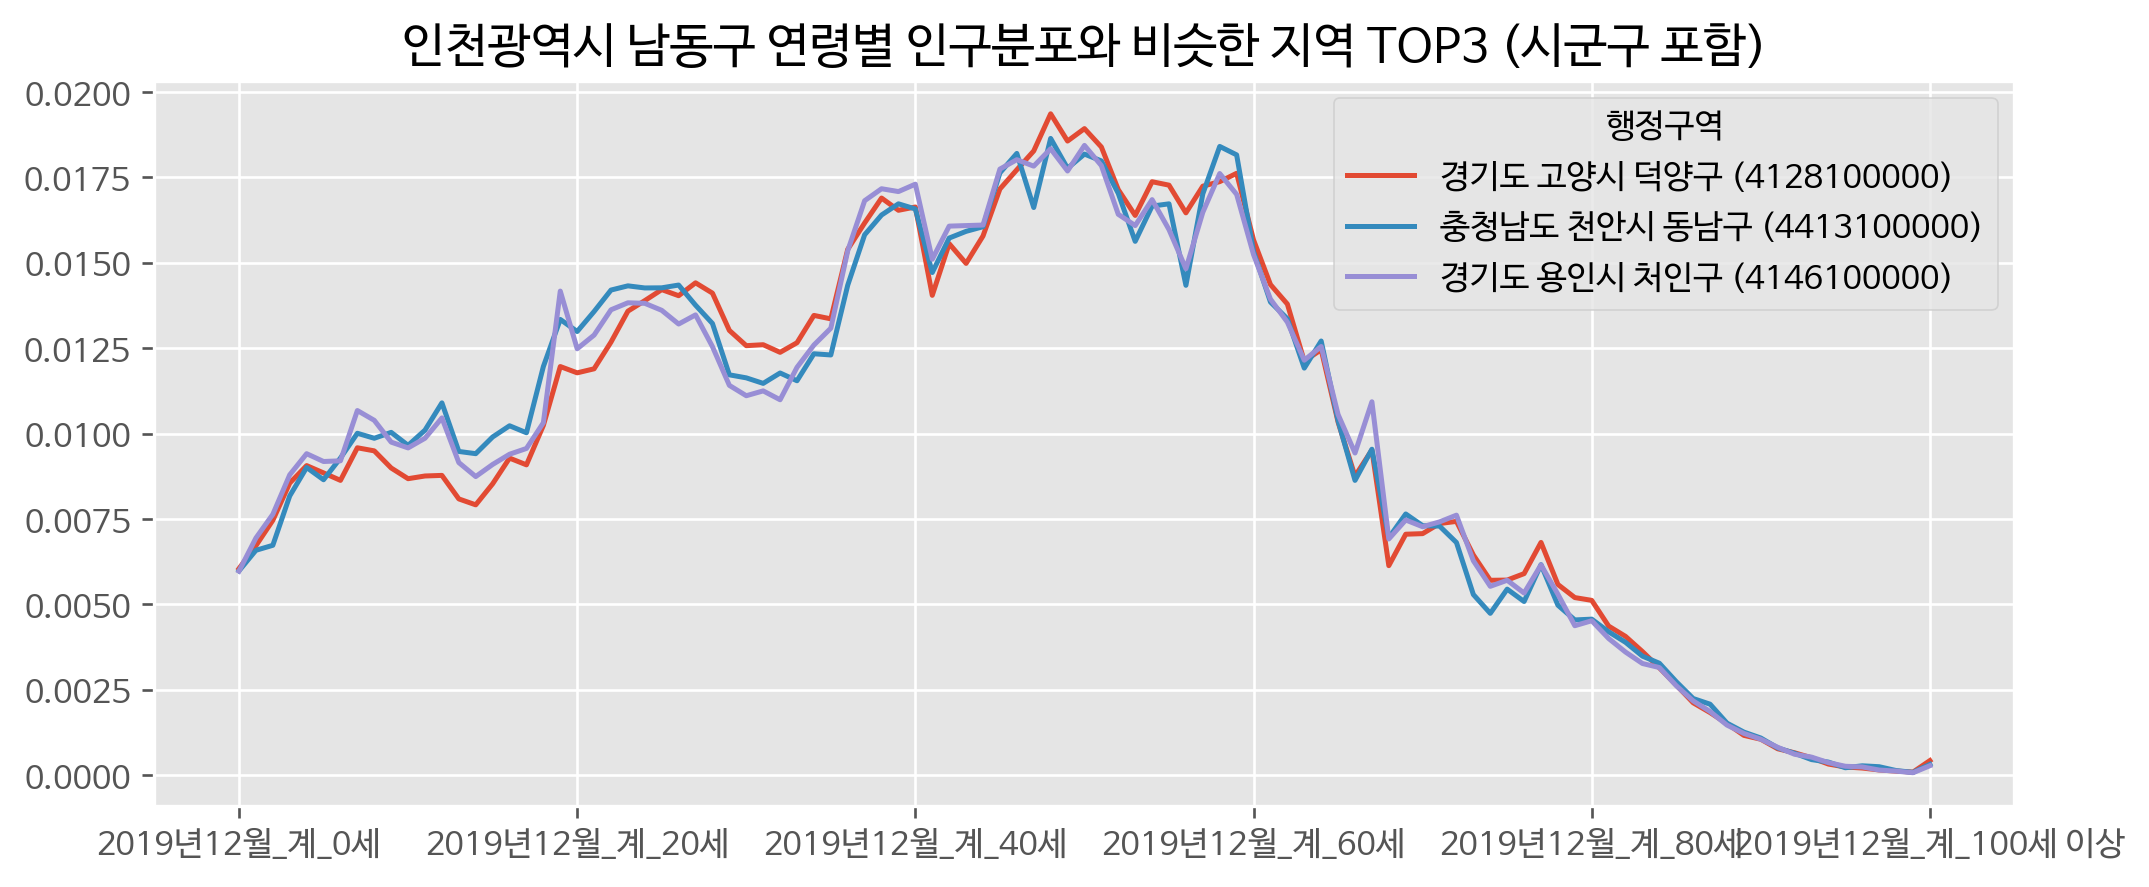

In [40]:
plt.rcParams['figure.figsize'] = (10,4)   # 조건을 아예 먹여버림
plt.rcParams['figure.dpi'] = 120

df_pop.loc[numpy.power(df_pop.sub(df2.iloc[0], axis = 1), 2).sum(axis = 1).sort_values().index[[2, 13, 15]]].T.plot()   # == home - away
# df.loc[numpy.power(df.sub(df2.iloc[0], axis = 1), 2).sum(axis = 1).sort_values().index[:5]].T.plot()  # 자기 자신이 나온다
plt.title('인천광역시 남동구 연령별 인구분포와 비슷한 지역 TOP3 (시군구 포함)')
plt.show()
print('='*180)

In [88]:
df3 = pandas.read_excel('/content/인천_인구비교_sum.xlsx')
df3.head()

,행정구역,2019년12월_계_0세,2019년12월_계_1세,2019년12월_계_2세,2019년12월_계_3세,2019년12월_계_4세,2019년12월_계_5세,2019년12월_계_6세,2019년12월_계_7세,2019년12월_계_8세,2019년12월_계_9세,2019년12월_계_10세,2019년12월_계_11세,2019년12월_계_12세,2019년12월_계_13세,2019년12월_계_14세,2019년12월_계_15세,2019년12월_계_16세,2019년12월_계_17세,2019년12월_계_18세,2019년12월_계_19세,2019년12월_계_20세,2019년12월_계_21세,2019년12월_계_22세,2019년12월_계_23세,2019년12월_계_24세,2019년12월_계_25세,2019년12월_계_26세,2019년12월_계_27세,2019년12월_계_28세,2019년12월_계_29세,2019년12월_계_30세,2019년12월_계_31세,2019년12월_계_32세,2019년12월_계_33세,2019년12월_계_34세,2019년12월_계_35세,2019년12월_계_36세,2019년12월_계_37세,2019년12월_계_38세,...,2019년12월_계_62세,2019년12월_계_63세,2019년12월_계_64세,2019년12월_계_65세,2019년12월_계_66세,2019년12월_계_67세,2019년12월_계_68세,2019년12월_계_69세,2019년12월_계_70세,2019년12월_계_71세,2019년12월_계_72세,2019년12월_계_73세,2019년12월_계_74세,2019년12월_계_75세,2019년12월_계_76세,2019년12월_계_77세,2019년12월_계_78세,2019년12월_계_79세,2019년12월_계_80세,2019년12월_계_81세,2019년12월_계_82세,2019년12월_계_83세,2019년12월_계_84세,2019년12월_계_85세,2019년12월_계_86세,2019년12월_계_87세,2019년12월_계_88세,2019년12월_계_89세,2019년12월_계_90세,2019년12월_계_91세,2019년12월_계_92세,2019년12월_계_93세,2019년12월_계_94세,2019년12월_계_95세,2019년12월_계_96세,2019년12월_계_97세,2019년12월_계_98세,2019년12월_계_99세,2019년12월_계_100세 이상,Unnamed: 104
0,서울특별시 (1100000000),0.005257,0.005630,0.006077,0.006756,0.007196,0.007106,0.007095,0.007828,0.007530,0.007637,0.007234,0.007702,0.008217,0.007578,0.007358,0.008190,0.008458,0.008507,0.009520,0.011477,0.011381,0.012042,0.013141,0.014137,0.015283,0.016269,0.016787,0.017572,0.017297,0.015810,0.015361,0.015250,0.014652,0.014589,0.014755,0.014539,0.015897,0.016799,0.016835,...,0.014540,0.013234,0.013986,0.011818,0.010431,0.011311,0.007906,0.008812,0.008864,0.008726,0.008913,0.007177,0.006282,0.006345,0.006161,0.007230,0.005762,0.004853,0.004709,0.004060,0.003588,0.003153,0.002872,0.002328,0.001913,0.001648,0.001298,0.001103,0.000980,0.000795,0.000629,0.000438,0.000330,0.000252,0.000249,0.000180,0.000128,0.000100,0.000642,NaN
1,부산광역시 (2600000000),0.004827,0.005616,0.006269,0.007151,0.007763,0.007654,0.007576,0.008367,0.008103,0.007949,0.007301,0.007683,0.008103,0.007296,0.007186,0.007877,0.008343,0.008411,0.009653,0.011112,0.011009,0.011730,0.012535,0.013366,0.013660,0.013715,0.013491,0.013632,0.013026,0.011594,0.011634,0.011257,0.010912,0.011022,0.011392,0.011788,0.013461,0.014817,0.015648,...,0.017512,0.016071,0.017129,0.014351,0.012680,0.013659,0.010941,0.010713,0.010916,0.010725,0.010269,0.008060,0.006836,0.007639,0.007556,0.008340,0.006870,0.006012,0.005706,0.004776,0.004259,0.003735,0.003345,0.002794,0.002207,0.001920,0.001505,0.001191,0.001063,0.000856,0.000679,0.000412,0.000334,0.000243,0.000205,0.000158,0.000100,0.000071,0.000524,NaN
2,대구광역시 (2700000000),0.005290,0.005974,0.006730,0.007707,0.008264,0.008221,0.008223,0.009151,0.008879,0.008800,0.008305,0.008744,0.009458,0.008579,0.008632,0.009292,0.010056,0.009854,0.011458,0.012912,0.012565,0.012866,0.013810,0.013926,0.014159,0.013832,0.013464,0.013550,0.012920,0.011655,0.011636,0.010849,0.010870,0.010981,0.011367,0.011401,0.013215,0.014710,0.015224,...,0.015061,0.013753,0.013928,0.011567,0.010854,0.011766,0.008972,0.008856,0.009157,0.009065,0.008477,0.006025,0.005424,0.006384,0.006589,0.007404,0.006052,0.005197,0.005277,0.004431,0.004009,0.003573,0.003230,0.002765,0.002177,0.001910,0.001452,0.001143,0.000901,0.000762,0.000578,0.000368,0.000301,0.000201,0.000155,0.000121,0.000089,0.000058,0.000278,NaN
3,인천광역시 (2800000000),0.005957,0.006544,0.007057,0.008042,0.008772,0.008680,0.008668,0.009551,0.009430,0.009272,0.008849,0.009127,0.009758,0.008716,0.008474,0.009092,0.009586,0.009440,0.010695,0.012052,0.011829,0.012276,0.013148,0.013631,0.014246,0.014685,0.014881,0.015182,0.014701,0.013265,0.012910,0.012599,0.012312,0.012566,0.013083,0.013257,0.015110,0.016601,0.017105,...,0.014445,0.012623,0.012892,0.010672,0.009041,0.009848,0.006418,0.007238,0.007387,0.007199,0.007335,0.005924,0.005032,0.005104,0.005078,0.005956,0.004812,0.004048,0.004101,0.003672,0.003176,0.002975,0.002709,0.002246,0.001881,0.001627,0.001297,0

In [90]:
df3 = df3.transpose()

In [93]:
for i in range(17):
  df3.loc['행정구역'][i] = str(df3.loc['행정구역'][i]).split(' ')[0]

In [97]:
df3 = df3.transpose()
df3

,행정구역,2019년12월_계_0세,2019년12월_계_1세,2019년12월_계_2세,2019년12월_계_3세,2019년12월_계_4세,2019년12월_계_5세,2019년12월_계_6세,2019년12월_계_7세,2019년12월_계_8세,2019년12월_계_9세,2019년12월_계_10세,2019년12월_계_11세,2019년12월_계_12세,2019년12월_계_13세,2019년12월_계_14세,2019년12월_계_15세,2019년12월_계_16세,2019년12월_계_17세,2019년12월_계_18세,2019년12월_계_19세,2019년12월_계_20세,2019년12월_계_21세,2019년12월_계_22세,2019년12월_계_23세,2019년12월_계_24세,2019년12월_계_25세,2019년12월_계_26세,2019년12월_계_27세,2019년12월_계_28세,2019년12월_계_29세,2019년12월_계_30세,2019년12월_계_31세,2019년12월_계_32세,2019년12월_계_33세,2019년12월_계_34세,2019년12월_계_35세,2019년12월_계_36세,2019년12월_계_37세,2019년12월_계_38세,...,2019년12월_계_62세,2019년12월_계_63세,2019년12월_계_64세,2019년12월_계_65세,2019년12월_계_66세,2019년12월_계_67세,2019년12월_계_68세,2019년12월_계_69세,2019년12월_계_70세,2019년12월_계_71세,2019년12월_계_72세,2019년12월_계_73세,2019년12월_계_74세,2019년12월_계_75세,2019년12월_계_76세,2019년12월_계_77세,2019년12월_계_78세,2019년12월_계_79세,2019년12월_계_80세,2019년12월_계_81세,2019년12월_계_82세,2019년12월_계_83세,2019년12월_계_84세,2019년12월_계_85세,2019년12월_계_86세,2019년12월_계_87세,2019년12월_계_88세,2019년12월_계_89세,2019년12월_계_90세,2019년12월_계_91세,2019년12월_계_92세,2019년12월_계_93세,2019년12월_계_94세,2019년12월_계_95세,2019년12월_계_96세,2019년12월_계_97세,2019년12월_계_98세,2019년12월_계_99세,2019년12월_계_100세 이상,Unnamed: 104
0,서울특별시,0.00525691,0.00563042,0.00607743,0.00675643,0.00719624,0.00710641,0.00709531,0.00782806,0.00752988,0.00763739,0.00723376,0.00770163,0.00821679,0.00757778,0.00735751,0.00818955,0.00845782,0.00850715,0.00951999,0.0114771,0.011381,0.0120422,0.0131406,0.0141368,0.0152833,0.0162685,0.0167865,0.0175719,0.0172972,0.0158101,0.0153606,0.0152499,0.0146518,0.0145891,0.0147554,0.0145395,0.0158973,0.0167992,0.0168347,...,0.0145399,0.0132339,0.0139858,0.011818,0.0104308,0.0113108,0.00790597,0.00881201,0.00886361,0.00872567,0.00891295,0.00717712,0.00628218,0.0063455,0.00616069,0.00723037,0.0057623,0.00485307,0.00470907,0.00405988,0.0035881,0.00315281,0.00287169,0.00232755,0.00191302,0.00164794,0.00129806,0.00110308,0.000980152,0.000794729,0.000628526,0.000437656,0.000329629,0.000251924,0.000248738,0.000180181,0.000127555,0.00010042,0.000641786,NaN
1,부산광역시,0.00482682,0.00561625,0.00626889,0.0071506,0.00776252,0.00765414,0.00757622,0.00836741,0.0081029,0.00794911,0.00730145,0.00768343,0.00810348,0.00729618,0.00718604,0.00787734,0.00834339,0.00841105,0.00965335,0.0111124,0.011009,0.0117305,0.0125354,0.0133656,0.0136603,0.0137148,0.0134913,0.0136324,0.0130261,0.0115937,0.0116335,0.0112571,0.010912,0.0110225,0.0113916,0.0117876,0.0134608,0.0148167,0.0156484,...,0.0175117,0.016071,0.0171291,0.0143507,0.0126796,0.0136588,0.010941,0.0107132,0.0109156,0.0107249,0.0102694,0.00806042,0.00683599,0.00763861,0.0075563,0.00833958,0.00686997,0.00601229,0.0057056,0.00477585,0.00425913,0.00373509,0.00334521,0.00279392,0.00220748,0.00192042,0.00150476,0.00119103,0.00106303,0.00085622,0.000679293,0.000412146,0.000334228,0.000242542,0.000204755,0.000157594,9.98875e-05,7.08879e-05,0.000524336,NaN
2,대구광역시,0.00528951,0.00597367,0.00673002,0.00770745,0.00826405,0.00822139,0.00822262,0.00915124,0.0088793,0.00880013,0.00830547,0.00874435,0.00945804,0.00857905,0.00863156,0.00929192,0.0100561,0.00985385,0.0114584,0.0129121,0.0125655,0.0128657,0.0138103,0.0139256,0.014159,0.0138321,0.0134637,0.0135503,0.0129199,0.0116549,0.011636,0.0108485,0.0108698,0.010981,0.0113674,0.011401,0.0132148,0.0147102,0.0152238,...,0.0150609,0.0137529,0.0139285,0.0115671,0.0108543,0.0117661,0.0089724,0.00885592,0.00915698,0.00906469,0.00847692,0.00602535,0.00542405,0.00638425,0.00658933,0.00740352,0.00605243,0.00519682,0.0052768,0.00443062,0.00400856,0.00357297,0.00323048,0.00276535,0.00217676,0.00190974,0.00145158,0.00114314,0.000900727,0.00076168,0.000578336,0.00036751,0.000300652,0.000201392,0.000154633,0.000121409,8.85961e-05,5.78336e-05,0.000278093,NaN
3,인천광역시,0.00595734,0.00654408,0.00705743,0.0080422,0.00877233,0.00868,0.00866783,0.00955081,0.00942974,0.00927249,0.00884943,0.00912674,0.00975812,0.00871619,0.00847372,0.00909224,0.00958632,0.00944023,0.0106945,0.0120516,0.0118295,0.0122755,0.013148,0.0136306,0.01424

In [102]:
df3.to_csv('인천_인구비교_final.csv', encoding = 'utf-8')

In [105]:
df3 = pandas.read_csv('/content/인천_인구비교_final.csv', index_col = 1)
del df3['Unnamed: 0']
df3.head()

,2019년12월_계_0세,2019년12월_계_1세,2019년12월_계_2세,2019년12월_계_3세,2019년12월_계_4세,2019년12월_계_5세,2019년12월_계_6세,2019년12월_계_7세,2019년12월_계_8세,2019년12월_계_9세,2019년12월_계_10세,2019년12월_계_11세,2019년12월_계_12세,2019년12월_계_13세,2019년12월_계_14세,2019년12월_계_15세,2019년12월_계_16세,2019년12월_계_17세,2019년12월_계_18세,2019년12월_계_19세,2019년12월_계_20세,2019년12월_계_21세,2019년12월_계_22세,2019년12월_계_23세,2019년12월_계_24세,2019년12월_계_25세,2019년12월_계_26세,2019년12월_계_27세,2019년12월_계_28세,2019년12월_계_29세,2019년12월_계_30세,2019년12월_계_31세,2019년12월_계_32세,2019년12월_계_33세,2019년12월_계_34세,2019년12월_계_35세,2019년12월_계_36세,2019년12월_계_37세,2019년12월_계_38세,2019년12월_계_39세,...,2019년12월_계_62세,2019년12월_계_63세,2019년12월_계_64세,2019년12월_계_65세,2019년12월_계_66세,2019년12월_계_67세,2019년12월_계_68세,2019년12월_계_69세,2019년12월_계_70세,2019년12월_계_71세,2019년12월_계_72세,2019년12월_계_73세,2019년12월_계_74세,2019년12월_계_75세,2019년12월_계_76세,2019년12월_계_77세,2019년12월_계_78세,2019년12월_계_79세,2019년12월_계_80세,2019년12월_계_81세,2019년12월_계_82세,2019년12월_계_83세,2019년12월_계_84세,2019년12월_계_85세,2019년12월_계_86세,2019년12월_계_87세,2019년12월_계_88세,2019년12월_계_89세,2019년12월_계_90세,2019년12월_계_91세,2019년12월_계_92세,2019년12월_계_93세,2019년12월_계_94세,2019년12월_계_95세,2019년12월_계_96세,2019년12월_계_97세,2019년12월_계_98세,2019년12월_계_99세,2019년12월_계_100세 이상,Unnamed: 104
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시,0.005257,0.005630,0.006077,0.006756,0.007196,0.007106,0.007095,0.007828,0.007530,0.007637,0.007234,0.007702,0.008217,0.007578,0.007358,0.008190,0.008458,0.008507,0.009520,0.011477,0.011381,0.012042,0.013141,0.014137,0.015283,0.016269,0.016787,0.017572,0.017297,0.015810,0.015361,0.015250,0.014652,0.014589,0.014755,0.014539,0.015897,0.016799,0.016835,0.016523,...,0.014540,0.013234,0.013986,0.011818,0.010431,0.011311,0.007906,0.008812,0.008864,0.008726,0.008913,0.007177,0.006282,0.006345,0.006161,0.007230,0.005762,0.004853,0.004709,0.004060,0.003588,0.003153,0.002872,0.002328,0.001913,0.001648,0.001298,0.001103,0.000980,0.000795,0.000629,0.000438,0.000330,0.000252,0.000249,0.000180,0.000128,0.000100,0.000642,NaN
부산광역시,0.004827,0.005616,0.006269,0.007151,0.007763,0.007654,0.007576,0.008367,0.008103,0.007949,0.007301,0.007683,0.008103,0.007296,0.007186,0.007877,0.008343,0.008411,0.009653,0.011112,0.011009,0.011730,0.012535,0.013366,0.013660,0.013715,0.013491,0.013632,0.013026,0.011594,0.011634,0.011257,0.010912,0.011022,0.011392,0.011788,0.013461,0.014817,0.015648,0.015700,...,0.017512,0.016071,0.017129,0.014351,0.012680,0.013659,0.010941,0.010713,0.010916,0.010725,0.010269,0.008060,0.006836,0.007639,0.007556,0.008340,0.006870,0.006012,0.005706,0.004776,0.004259,0.003735,0.003345,0.002794,0.002207,0.001920,0.001505,0.001191,0.001063,0.000856,0.000679,0.000412,0.000334,0.000243,0.000205,0.000158,0.000100,0.000071,0.000524,NaN
대구광역시,0.005290,0.005974,0.006730,0.007707,0.008264,0.008221,0.008223,0.009151,0.008879,0.008800,0.008305,0.008744,0.009458,0.008579,0.008632,0.009292,0.010056,0.009854,0.011458,0.012912,0.012565,0.012866,0.013810,0.013926,0.014159,0.013832,0.013464,0.013550,0.012920,0.011655,0.011636,0.010849,0.010870,0.010981,0.011367,0.011401,0.013215,0.014710,0.015224,0.015253,...,0.015061,0.013753,0.013928,0.011567,0.010854,0.011766,0.008972,0.008856,0.009157,0.009065,0.008477,0.006025,0.005424,0.006384,0.006589,0.007404,0.006052,0.005197,0.005277,0.004431,0.004009,0.003573,0.003230,0.002765,0.002177,0.001910,0.001452,0.001143,0.000901,0.000762,0.000578,0.000368,0.000301,0.000201,0.000155,0.000121,0.000089,0.000058,0.000278,NaN
인천광역시,0.005957,0.006544,0.007057,0.008042,0.008772,0.008680,0.008668,0.009551,0.009430,0.009272,0.008849,0.009127,0.009758,0.008716,0.008474,0.009092,0.009586,0.009440,0.010695,0.012052,0.011829,0.012276,0.013148,0.013631,0.014246,0.014685,0.014881,0.015182,0.014701,0.013265,0.012910,0.012599,0.012312,0.012566,0.013083,0.013257,0.015110,0.016601,0.017105,0.016892,...,0.014445,0.012623,0.012892,0.010672,0.009041,0.009848,0.006418,0.007238,0.007387,0.007199,0.007335,0.005924,0.005032,0.005104,0.005078,0.005956,0.004812,0.004048,0.004101,0

인천광역시와 비슷한 지역

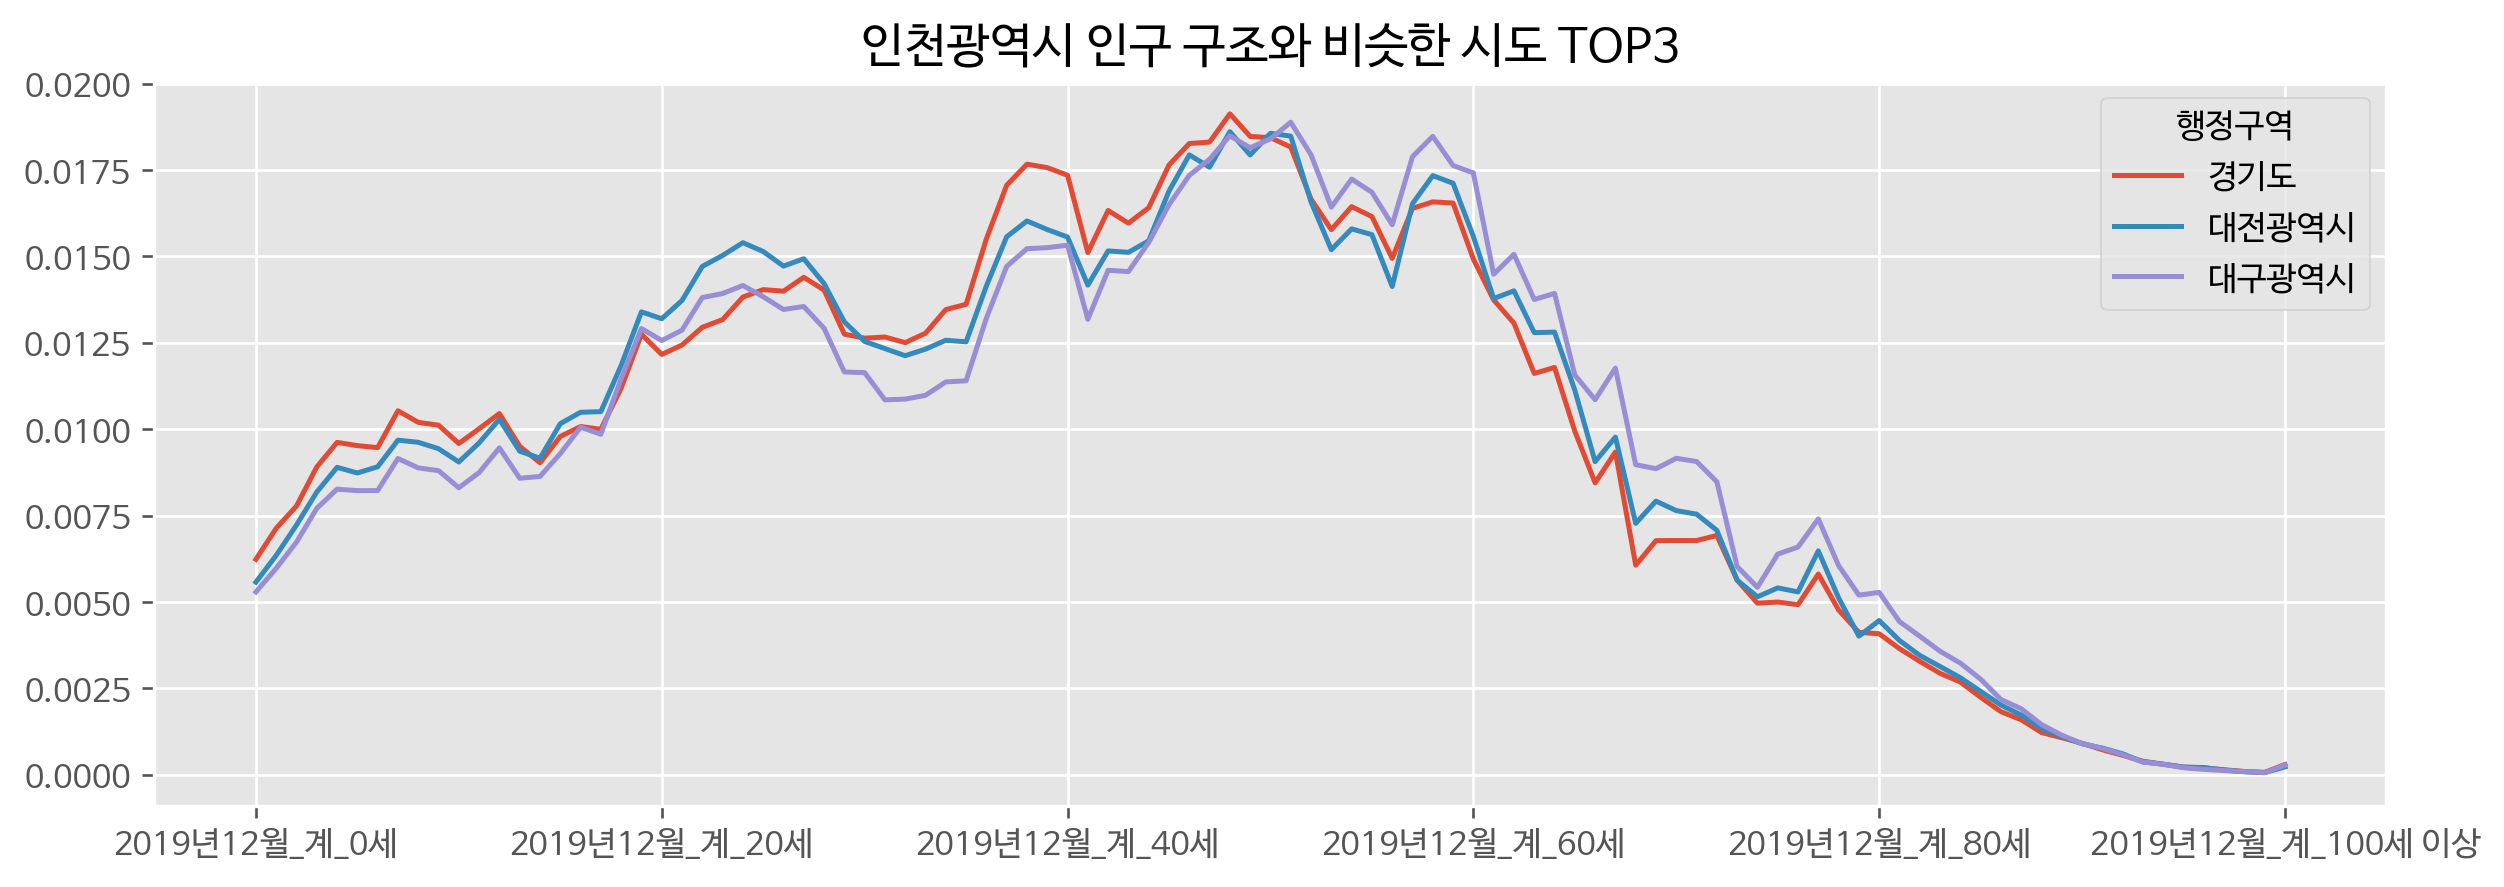

In [128]:
plt.rcParams['figure.figsize'] = (12,4)   # 조건을 아예 먹여버림
plt.rcParams['figure.dpi'] = 120
plt.style.use('ggplot')

df3.loc[numpy.power(df3.sub(df2.iloc[0], axis = 1), 2).sum(axis = 1).sort_values().index[[1, 2, 4]]].T.plot()
plt.title('인천광역시 인구 구조와 비슷한 시도 TOP3')
plt.show()

커피 수입 추세 분석

In [120]:
coffee_df = pandas.read_csv('/content/품목별_수출액__수입액_20210624230604.csv', encoding = 'cp949')

In [122]:
# 수출액 열 삭제
coffee_df.drop(coffee_df.columns[[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46]], axis = 1, inplace = True)

In [123]:
coffee_df = coffee_df.loc[coffee_df['품목별(2)'] == '커피차코코아향신료 및 동제품']
del coffee_df['품목별(1)'], coffee_df['품목별(2)']
coffee_df

,2018. 02.1,2018. 03.1,2018. 04.1,2018. 05.1,2018. 06.1,2018. 07.1,2018. 08.1,2018. 09.1,2018. 10.1,2018. 11.1,2018. 12.1,2019. 01.1,2019. 02.1,2019. 03.1,2019. 04.1,2019. 05.1,2019. 06.1,2019. 07.1,2019. 08.1,2019. 09.1,2019. 10.1,2019. 11.1,2019. 12.1
10,87250,92760,99780,99060,97836,94776,101061,86874,118716,118363,101487,127795,87219,96335,111908,97564,101220,107108,95211,100994,118090,108008,119034


In [14]:
coffee_df.to_csv('커피 수입액.csv')

In [19]:
coffee_df = pandas.read_csv('/content/커피 수입액1.csv', index_col = 0)
coffee_df.head(3)

,2018. 02,2018. 03,2018. 04,2018. 05,2018. 06,2018. 07,2018. 08,2018. 09,2018. 10,2018. 11,2018. 12,2019. 01,2019. 02,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12
10,87250,92760,99780,99060,97836,94776,101061,86874,118716,118363,101487,127795,87219,96335,111908,97564,101220,107108,95211,100994,118090,108008,119034


In [20]:
plt.rcParams['figure.figsize'] = (10,4)   # 조건을 아예 먹여버림
plt.rcParams['figure.dpi'] = 120
plt.style.use('ggplot')

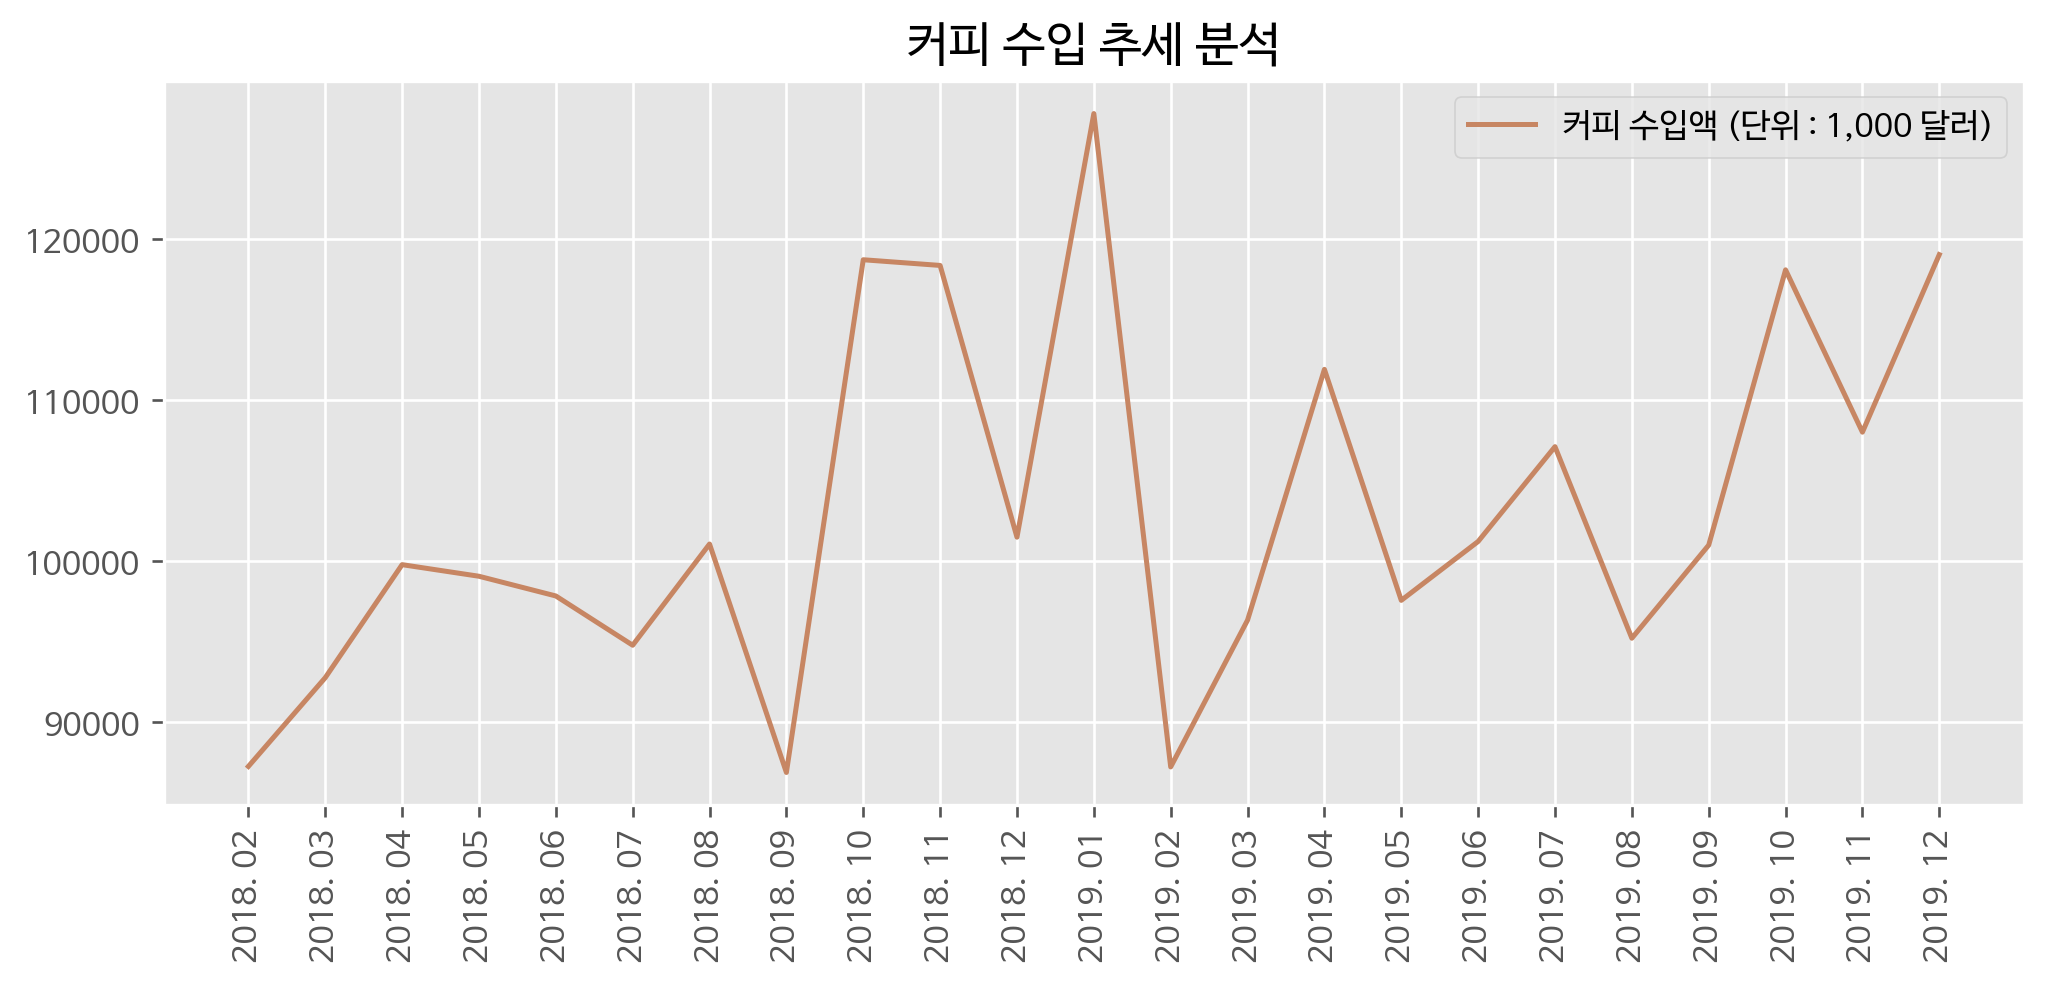

In [21]:
plt.plot(coffee_df.T, color = '#c78663', label = '커피 수입액 (단위 : 1,000 달러)')
plt.title('커피 수입 추세 분석')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

온실가스 추세 분석

In [10]:
onsil_df = pandas.read_csv('/content/온실가스.csv')
onsil_df.head()

,온실가스유형별,2018. 01,2018. 02,2018. 03,2018. 04,2018. 05,2018. 06,2018. 07,2018. 08,2018. 09,2018. 10,2018. 11,2018. 12,2019. 01,2019. 02,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12
0,이산화탄소 (ppm),416.8,418.0,419.1,419.7,417.7,414.1,410.2,407.0,408.9,414.2,417.7,418.4,419.0,420.0,421.1,422.0,420.5,416.8,413.6,411.8,412.8,416.2,419.3,421.2
1,메탄 (ppb),1983.0,1981.0,1983.0,1969.0,1972.0,1964.0,1948.0,1951.0,1981.0,1981.0,1988.0,1989.0,1998.0,2002.0,1989.0,1970.0,1984.0,1993.0,1958.0,1979.0,2011.0,1998.0,1998.0,2013.0
2,아산화질소 (ppb),332.3,332.1,333.2,333.2,333.1,333.4,333.1,333.0,332.6,332.7,333.3,333.0,332.5,333.2,333.3,333.5,334.3,334.8,334.5,334.2,334.4,334.3,333.8,333.9
3,염화불화탄소11 (ppt),227.5,227.4,228.1,229.5,230.4,230.7,228.3,228.1,228.0,228.4,228.2,224.6,231.3,231.8,231.8,232.2,229.4,229.5,226.0,225.7,226.8,227.0,227.2,227.0
4,염화불화탄소113 (ppt),70.0,70.1,70.3,70.4,70.5,70.5,70.2,70.2,69.7,69.7,69.9,69.5,71.0,70.9,70.9,70.7,69.5,69.2,68.8,68.8,69.4,69.3,68.3,68.2


In [11]:
co2 = onsil_df[onsil_df['온실가스유형별'] == '이산화탄소 (ppm)']
del co2['온실가스유형별']
co2

,2018. 01,2018. 02,2018. 03,2018. 04,2018. 05,2018. 06,2018. 07,2018. 08,2018. 09,2018. 10,2018. 11,2018. 12,2019. 01,2019. 02,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12
0,416.8,418.0,419.1,419.7,417.7,414.1,410.2,407.0,408.9,414.2,417.7,418.4,419.0,420.0,421.1,422.0,420.5,416.8,413.6,411.8,412.8,416.2,419.3,421.2


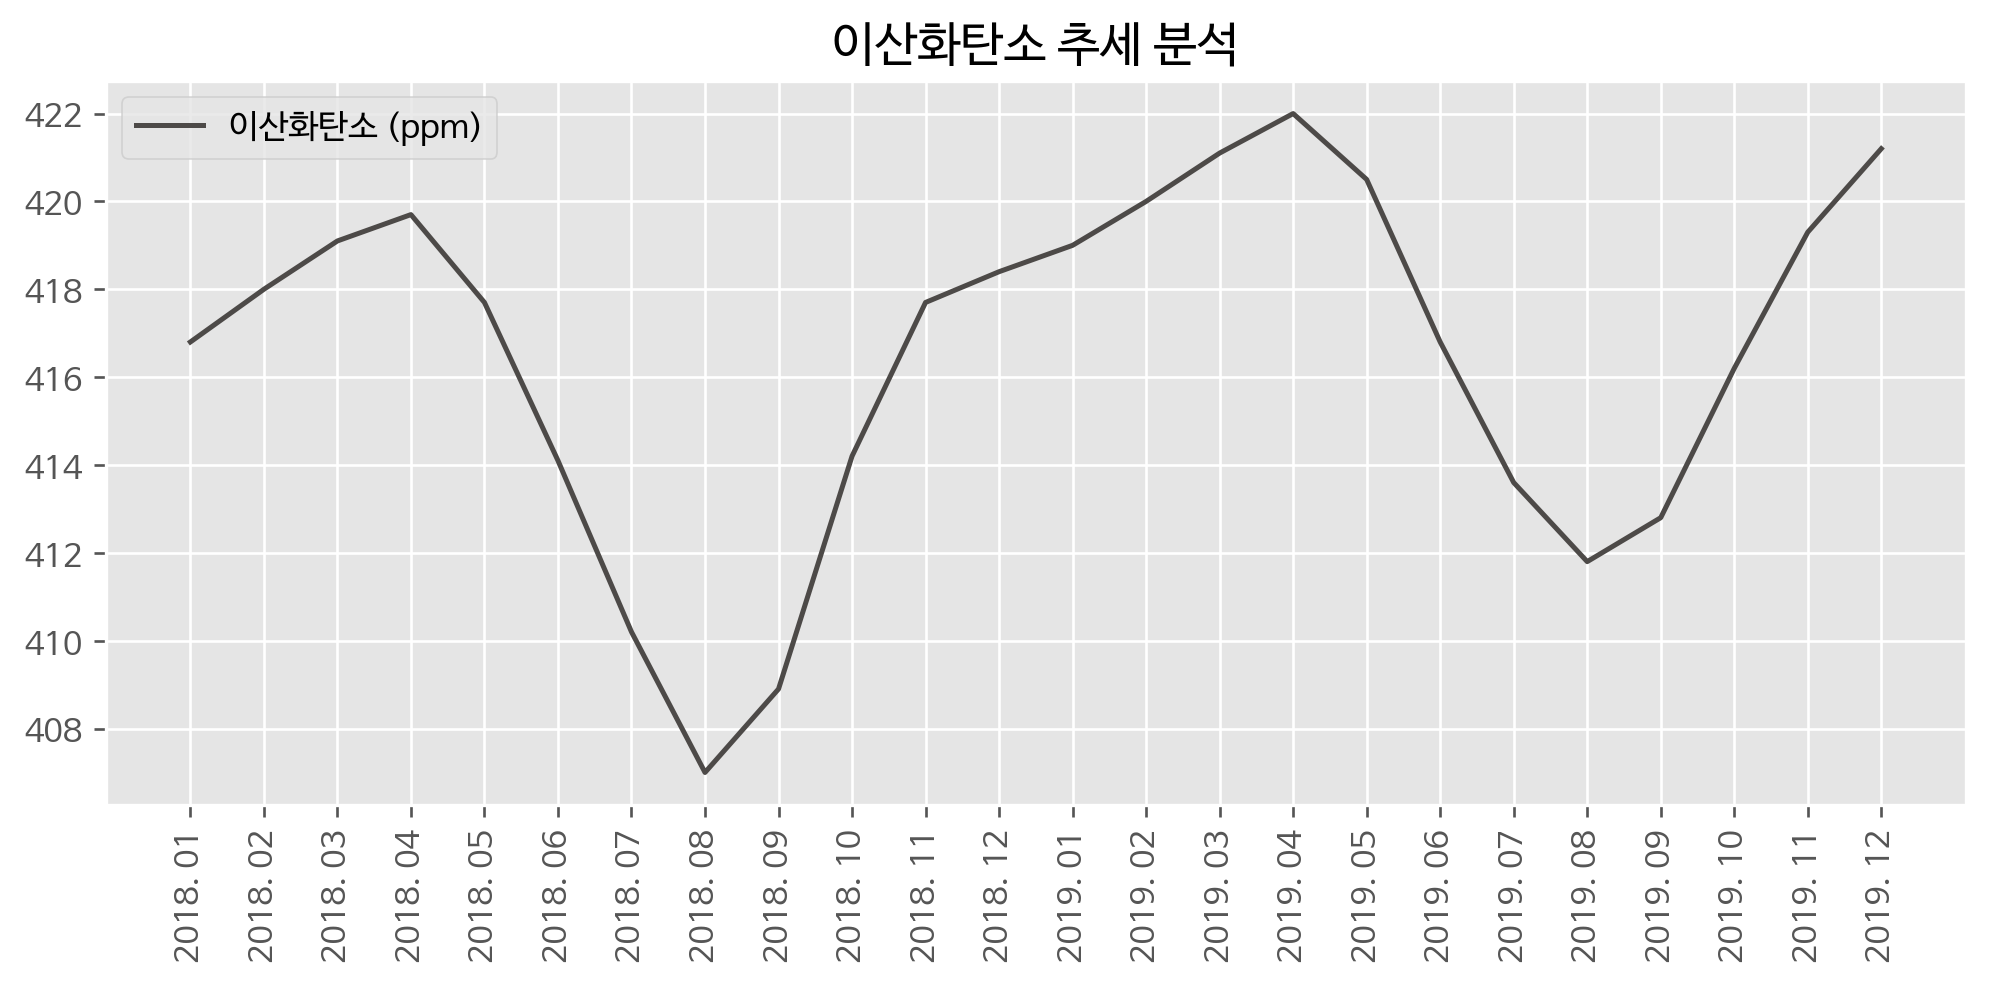

In [13]:
plt.plot(co2.T, color = '#4d4a48', label = '이산화탄소 (ppm)')
plt.title('이산화탄소 추세 분석')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [23]:
ch4 = onsil_df[onsil_df['온실가스유형별'] == '메탄 (ppb)']
del ch4['온실가스유형별']
ch4

,2018. 01,2018. 02,2018. 03,2018. 04,2018. 05,2018. 06,2018. 07,2018. 08,2018. 09,2018. 10,2018. 11,2018. 12,2019. 01,2019. 02,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12
1,1983.0,1981.0,1983.0,1969.0,1972.0,1964.0,1948.0,1951.0,1981.0,1981.0,1988.0,1989.0,1998.0,2002.0,1989.0,1970.0,1984.0,1993.0,1958.0,1979.0,2011.0,1998.0,1998.0,2013.0


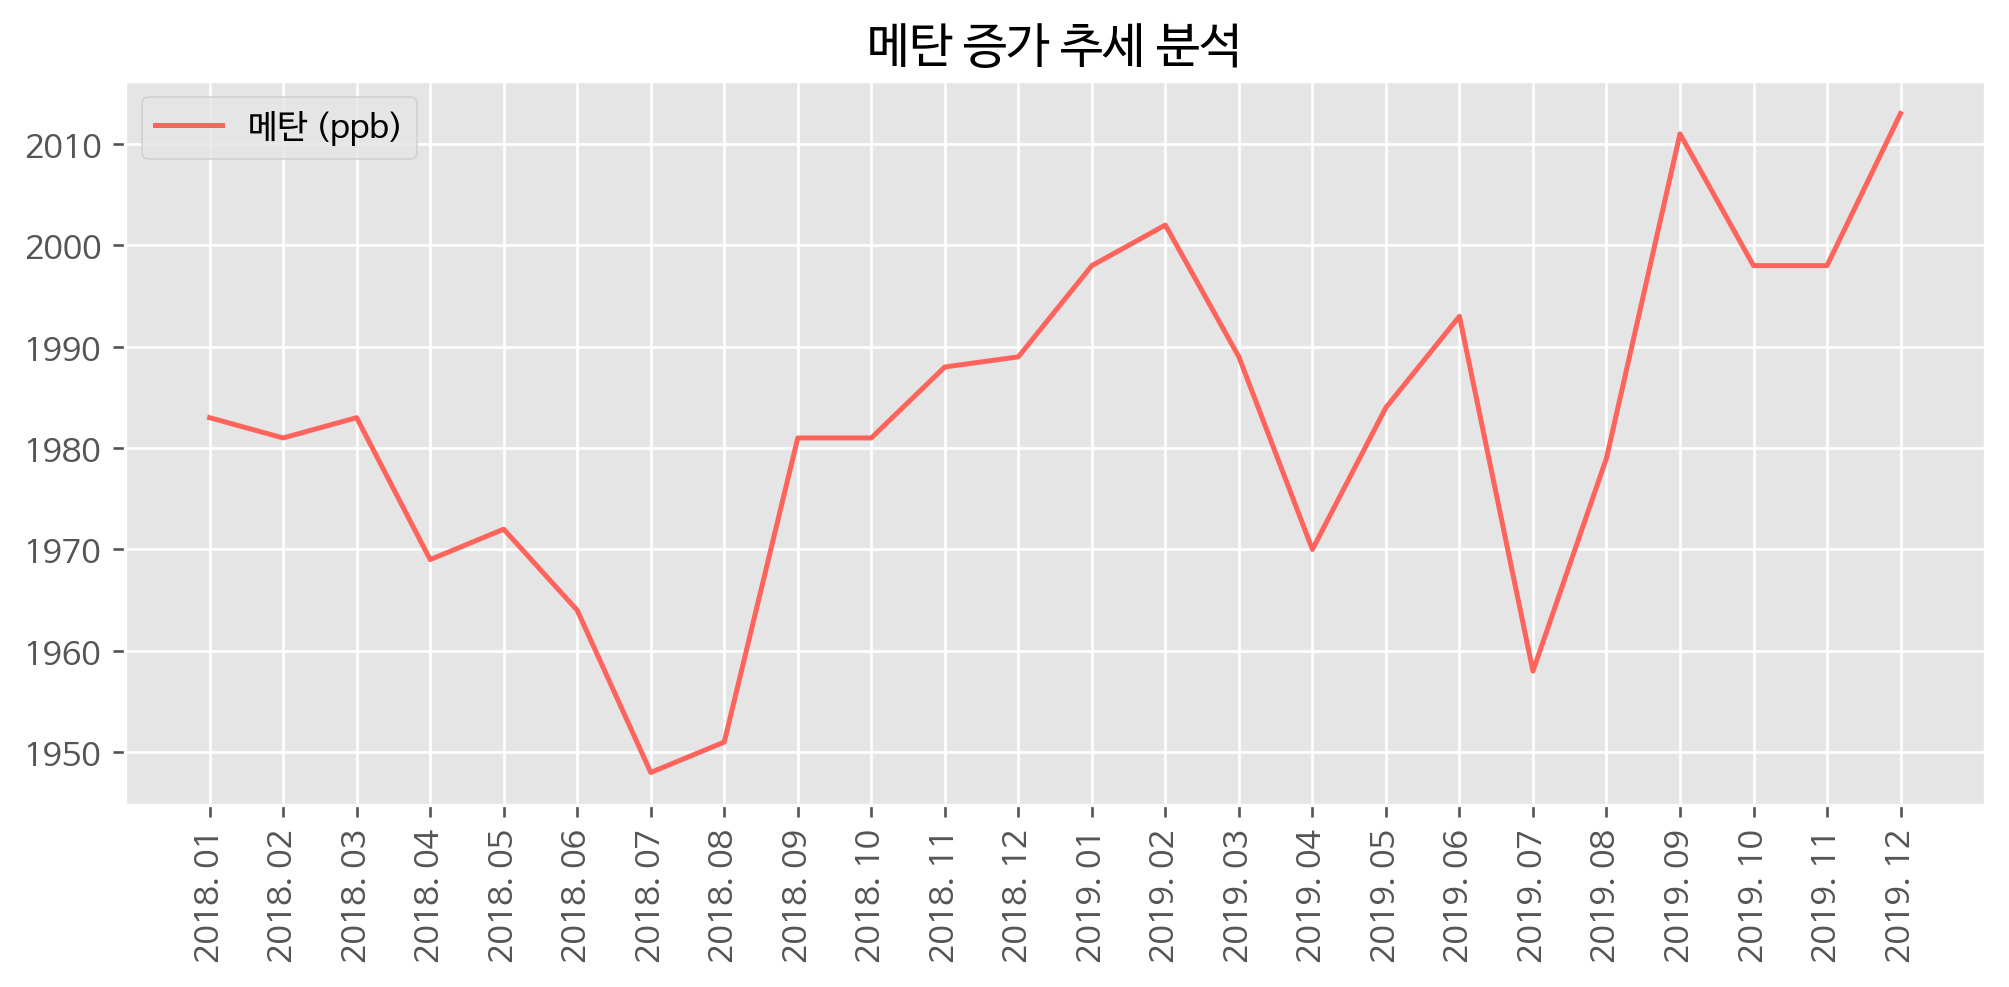

In [24]:
plt.plot(ch4.T, color = '#ff645c', label = '메탄 (ppb)')
plt.title('메탄 증가 추세 분석')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [116]:
no2 = onsil_df[onsil_df['온실가스유형별'] == '아산화질소 (ppb)']
del no2['온실가스유형별']
no2

,2018. 01,2018. 02,2018. 03,2018. 04,2018. 05,2018. 06,2018. 07,2018. 08,2018. 09,2018. 10,2018. 11,2018. 12,2019. 01,2019. 02,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12
2,332.3,332.1,333.2,333.2,333.1,333.4,333.1,333.0,332.6,332.7,333.3,333.0,332.5,333.2,333.3,333.5,334.3,334.8,334.5,334.2,334.4,334.3,333.8,333.9


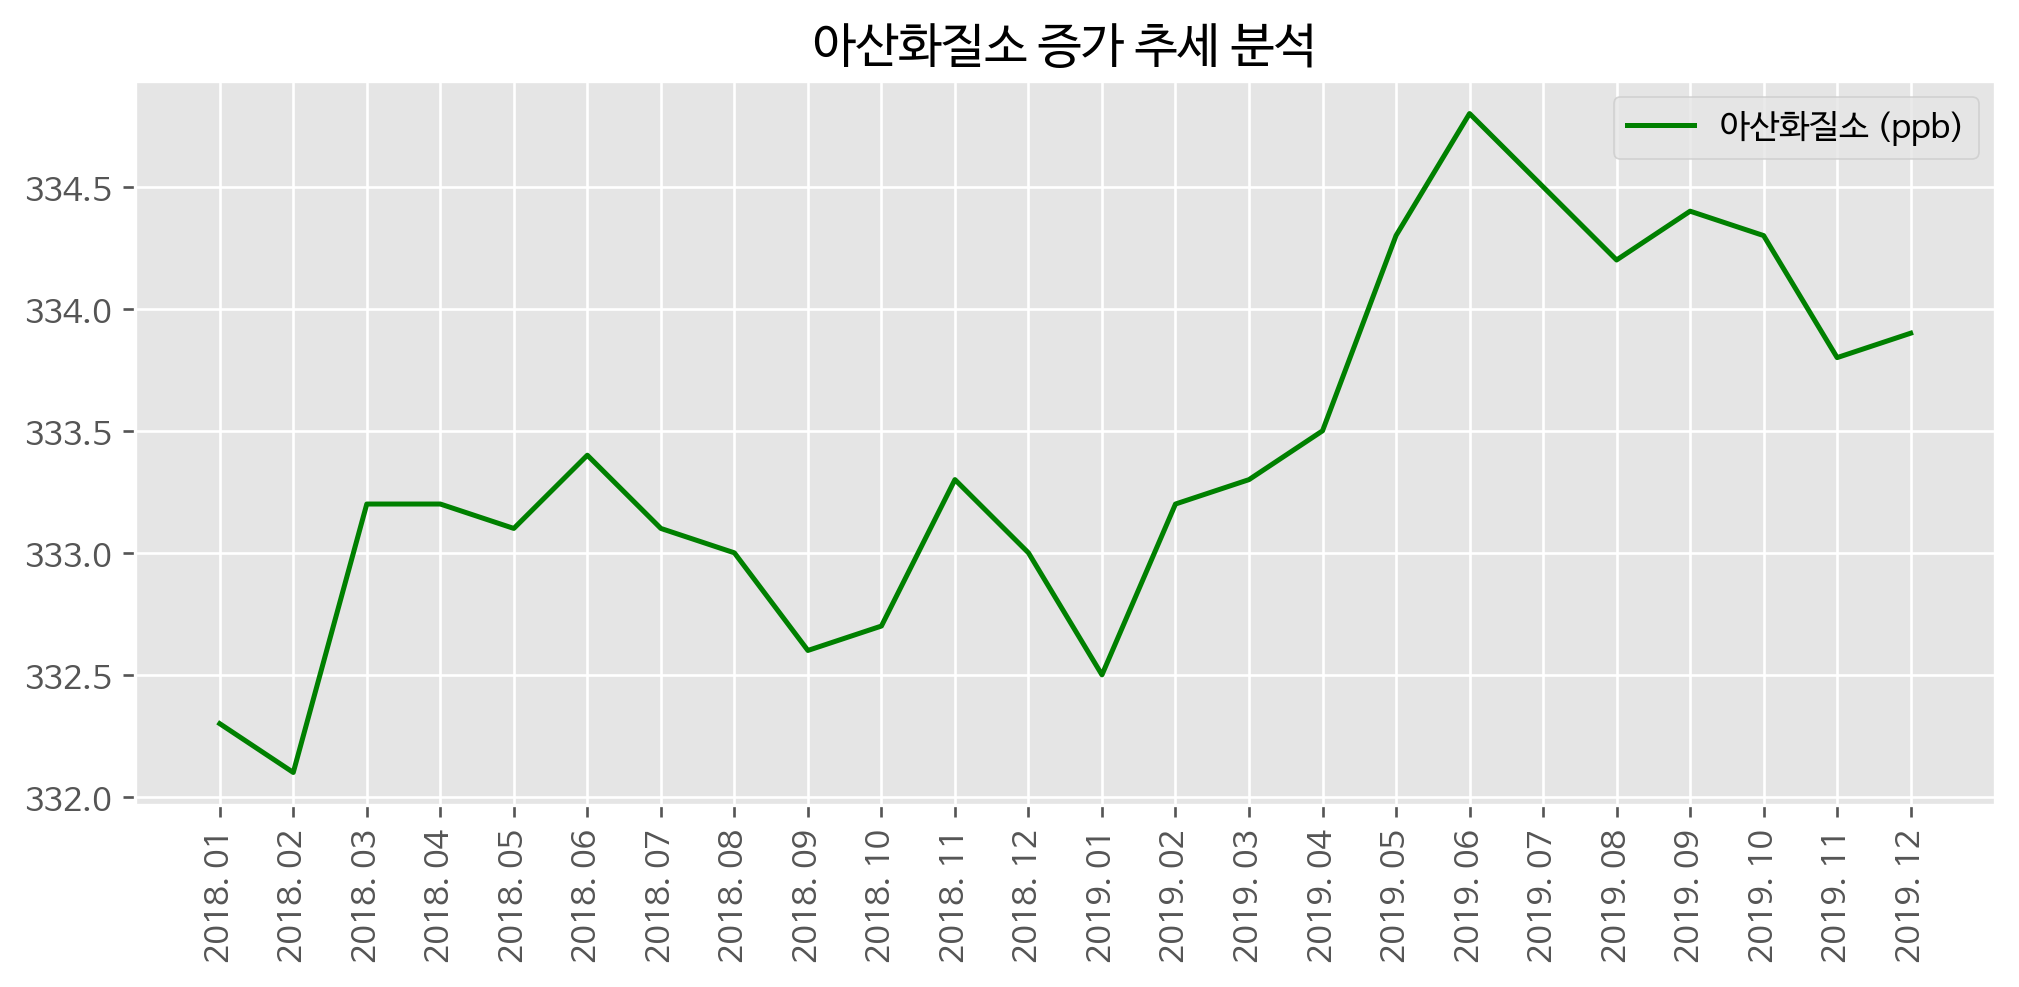

In [117]:
plt.plot(no2.T, color = 'green', label = '아산화질소 (ppb)')
plt.title('아산화질소 증가 추세 분석')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [120]:
cfc11 = onsil_df[onsil_df['온실가스유형별'] == '염화불화탄소11 (ppt)']
del cfc11['온실가스유형별']
cfc11

,2018. 01,2018. 02,2018. 03,2018. 04,2018. 05,2018. 06,2018. 07,2018. 08,2018. 09,2018. 10,2018. 11,2018. 12,2019. 01,2019. 02,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12
3,227.5,227.4,228.1,229.5,230.4,230.7,228.3,228.1,228.0,228.4,228.2,224.6,231.3,231.8,231.8,232.2,229.4,229.5,226.0,225.7,226.8,227.0,227.2,227.0


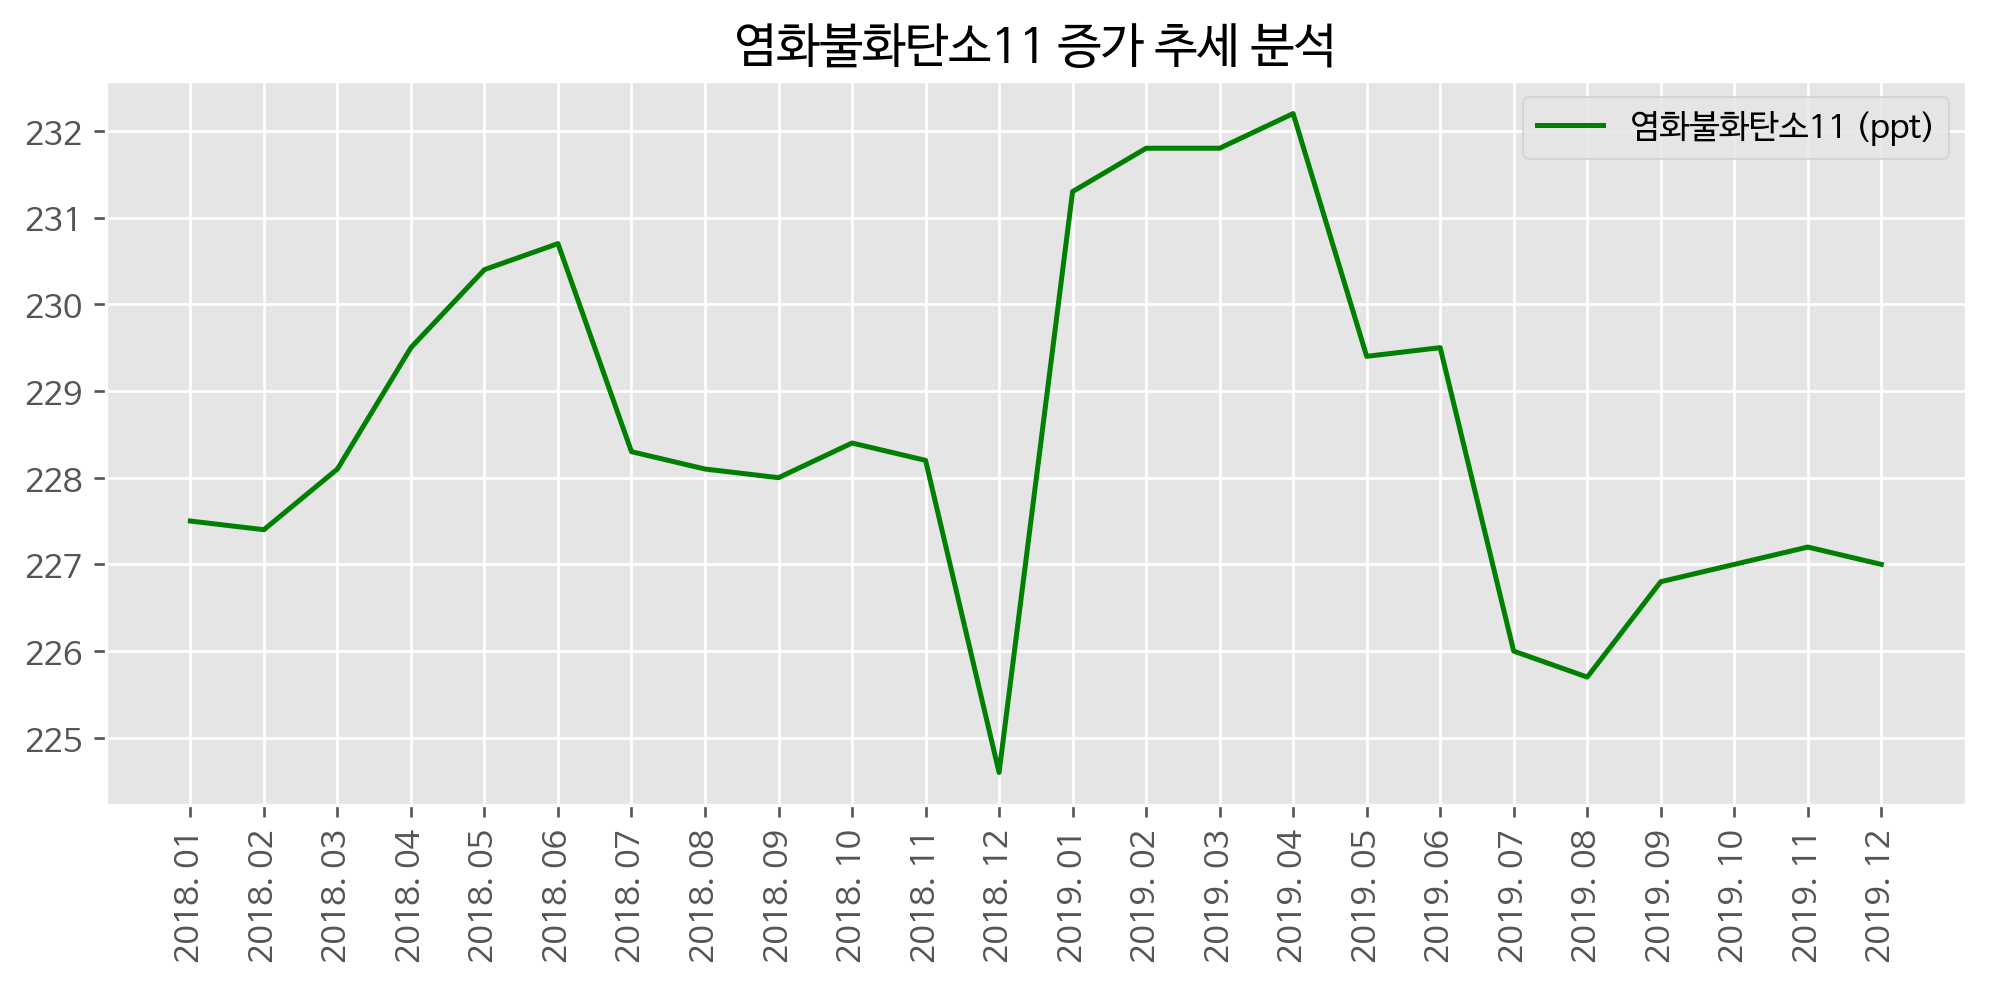

In [121]:
plt.plot(cfc11.T, color = 'green', label = '염화불화탄소11 (ppt)')
plt.title('염화불화탄소11 증가 추세 분석')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [136]:
total_df = pandas.read_csv('/content/전국_시도·산업·사업체구분별_사업체수__종사자수_20210626091135.csv')
total_df

,행정구역별,산업별,사업체구분별,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1
0,행정구역별,산업별,사업체구분별,사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명)
1,전국,커피 전문점,계,51551,152523,56928,164512,66231,197088,76145,224328
2,전국,커피 전문점,단독사업체,47795,125238,52804,134246,61428,161112,70829,184045
3,전국,커피 전문점,"본사,본점 등",178,1151,207,1398,260,1601,322,2028
4,전국,커피 전문점,"공장,지사(점),영업소",3578,26134,3917,28868,4543,34375,4994,38255
...,...,...,...,...,...,...,...,...,...,...,...
68,경남,커피 전문점,"공장,지사(점),영업소",81,598,89,678,109,855,126,989
69,제주,커피 전문점,계,942,2420,1129,2761,1415,3529,1706,4328
70,제주,커피 전문점,단독사업체,900,2112,1075,2363,1347,3027,1616,3682
71,제주,커피 전문점,"본사,본점 등",2,X,4,23,8,51,11,85


In [110]:
stotal_df = pandas.read_csv('/content/전국_사업체_수.csv')
jtotal_df = pandas.read_csv('/content/전국_종사자_수.csv')
stotal_df.head(3)

,행정구역별,2016,2017,2018,2019
0,전국,51551,56928,66231,76145
1,서울,13187,13662,15056,16255
2,부산,3253,3596,4190,4807


In [113]:
stotal_df = stotal_df.transpose()
stotal_df

,행정구역별,2016,2017,2018,2019
0,전국,51551,56928,66231,76145
1,서울,13187,13662,15056,16255
2,부산,3253,3596,4190,4807
3,대구,2697,2975,3314,3707
4,인천,2367,2743,3238,3728
5,광주,1731,1967,2254,2662
6,대전,1840,2062,2416,2787
7,울산,1047,1141,1364,1599
8,세종,231,266,356,490
9,경기,11386,12524,14672,16951


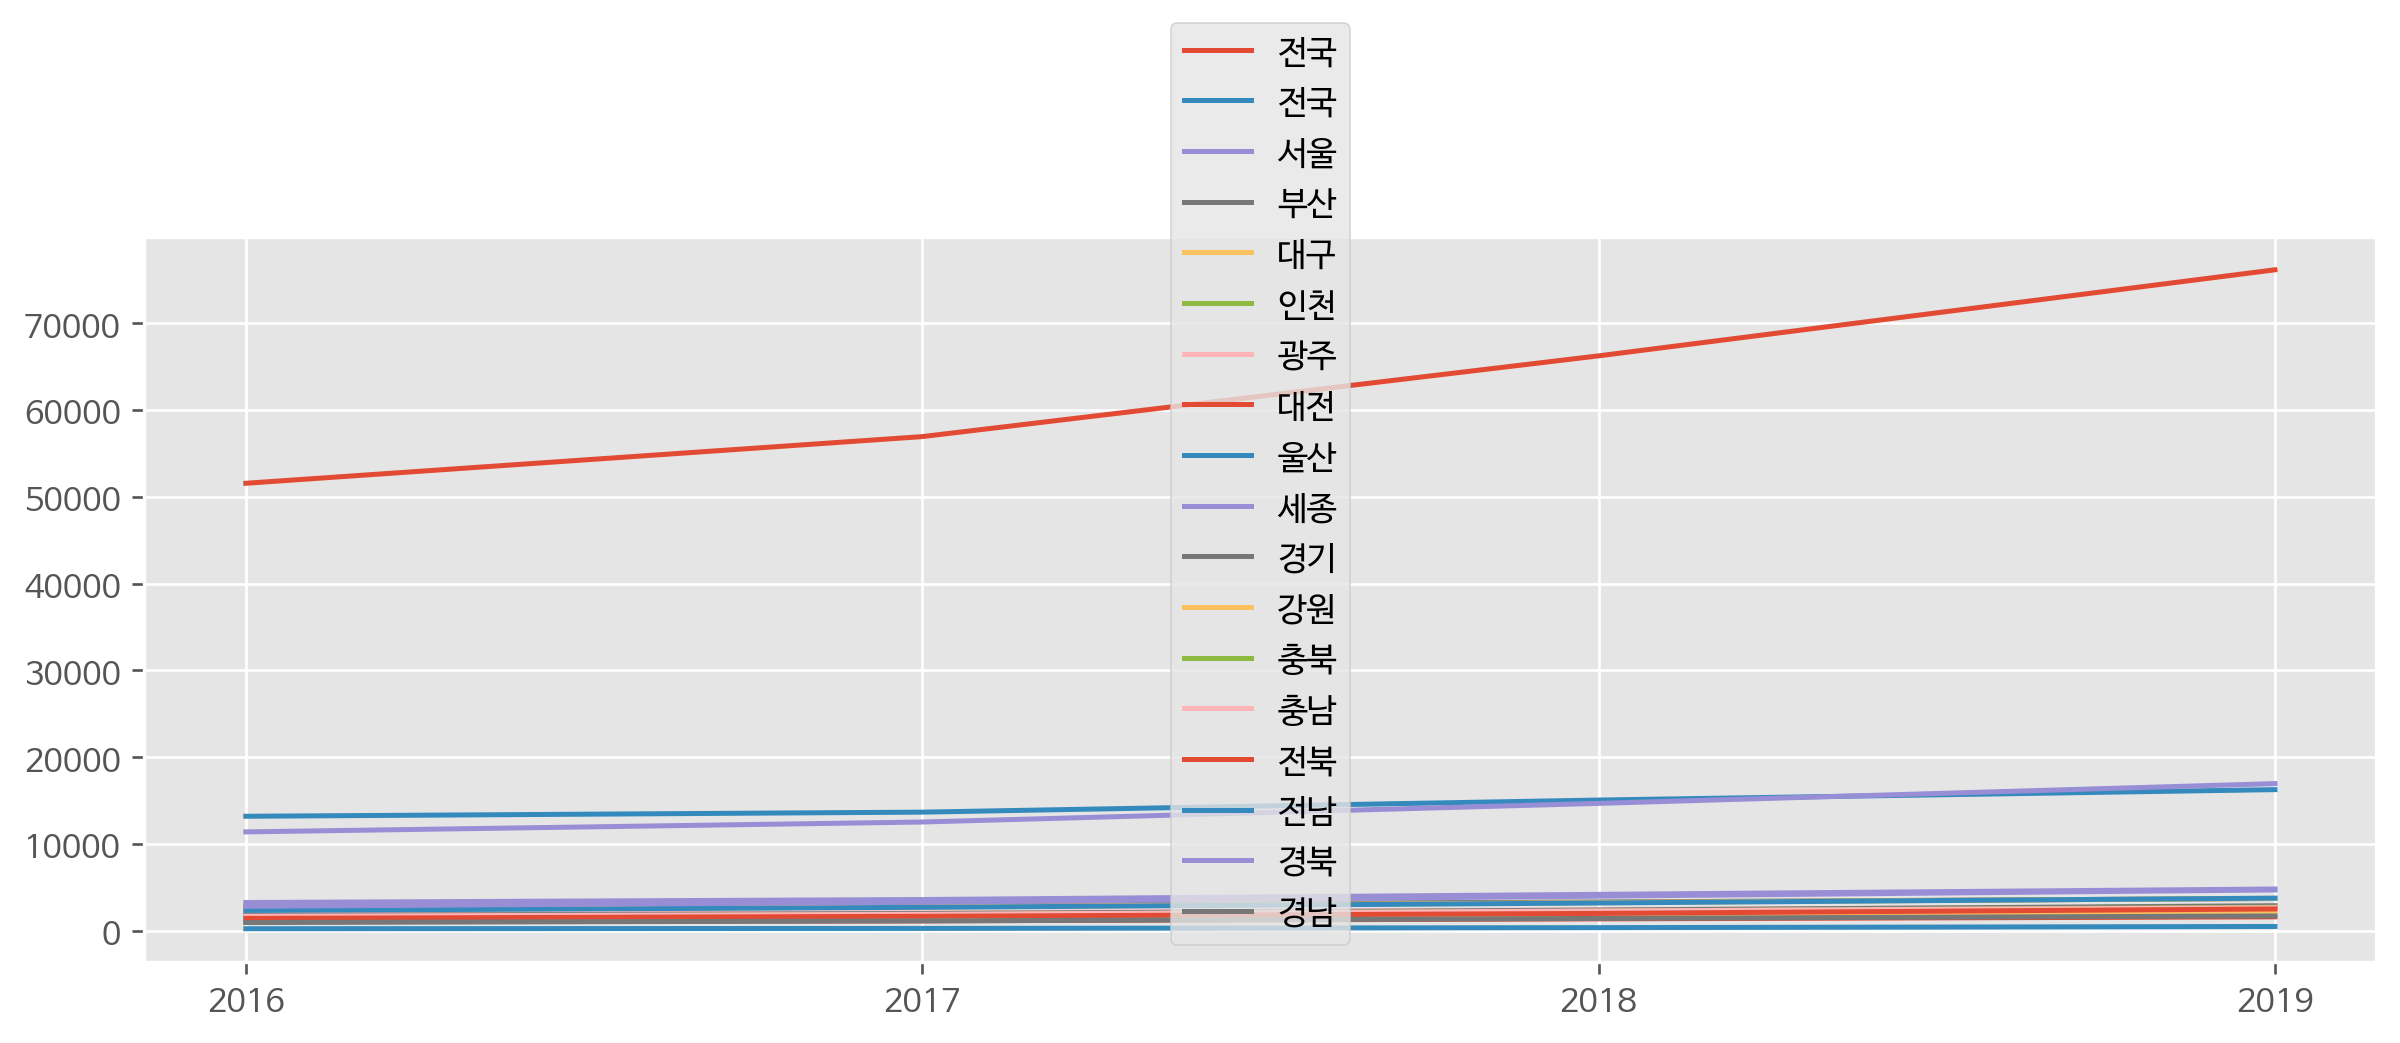

In [122]:
names = [] * 16

for i in range(len(stotal_df)):
  names.append(stotal_df.iloc[i][0])
  plt.plot(stotal_df.iloc[i][1:], label = names[i-1])
plt.legend()
plt.show()

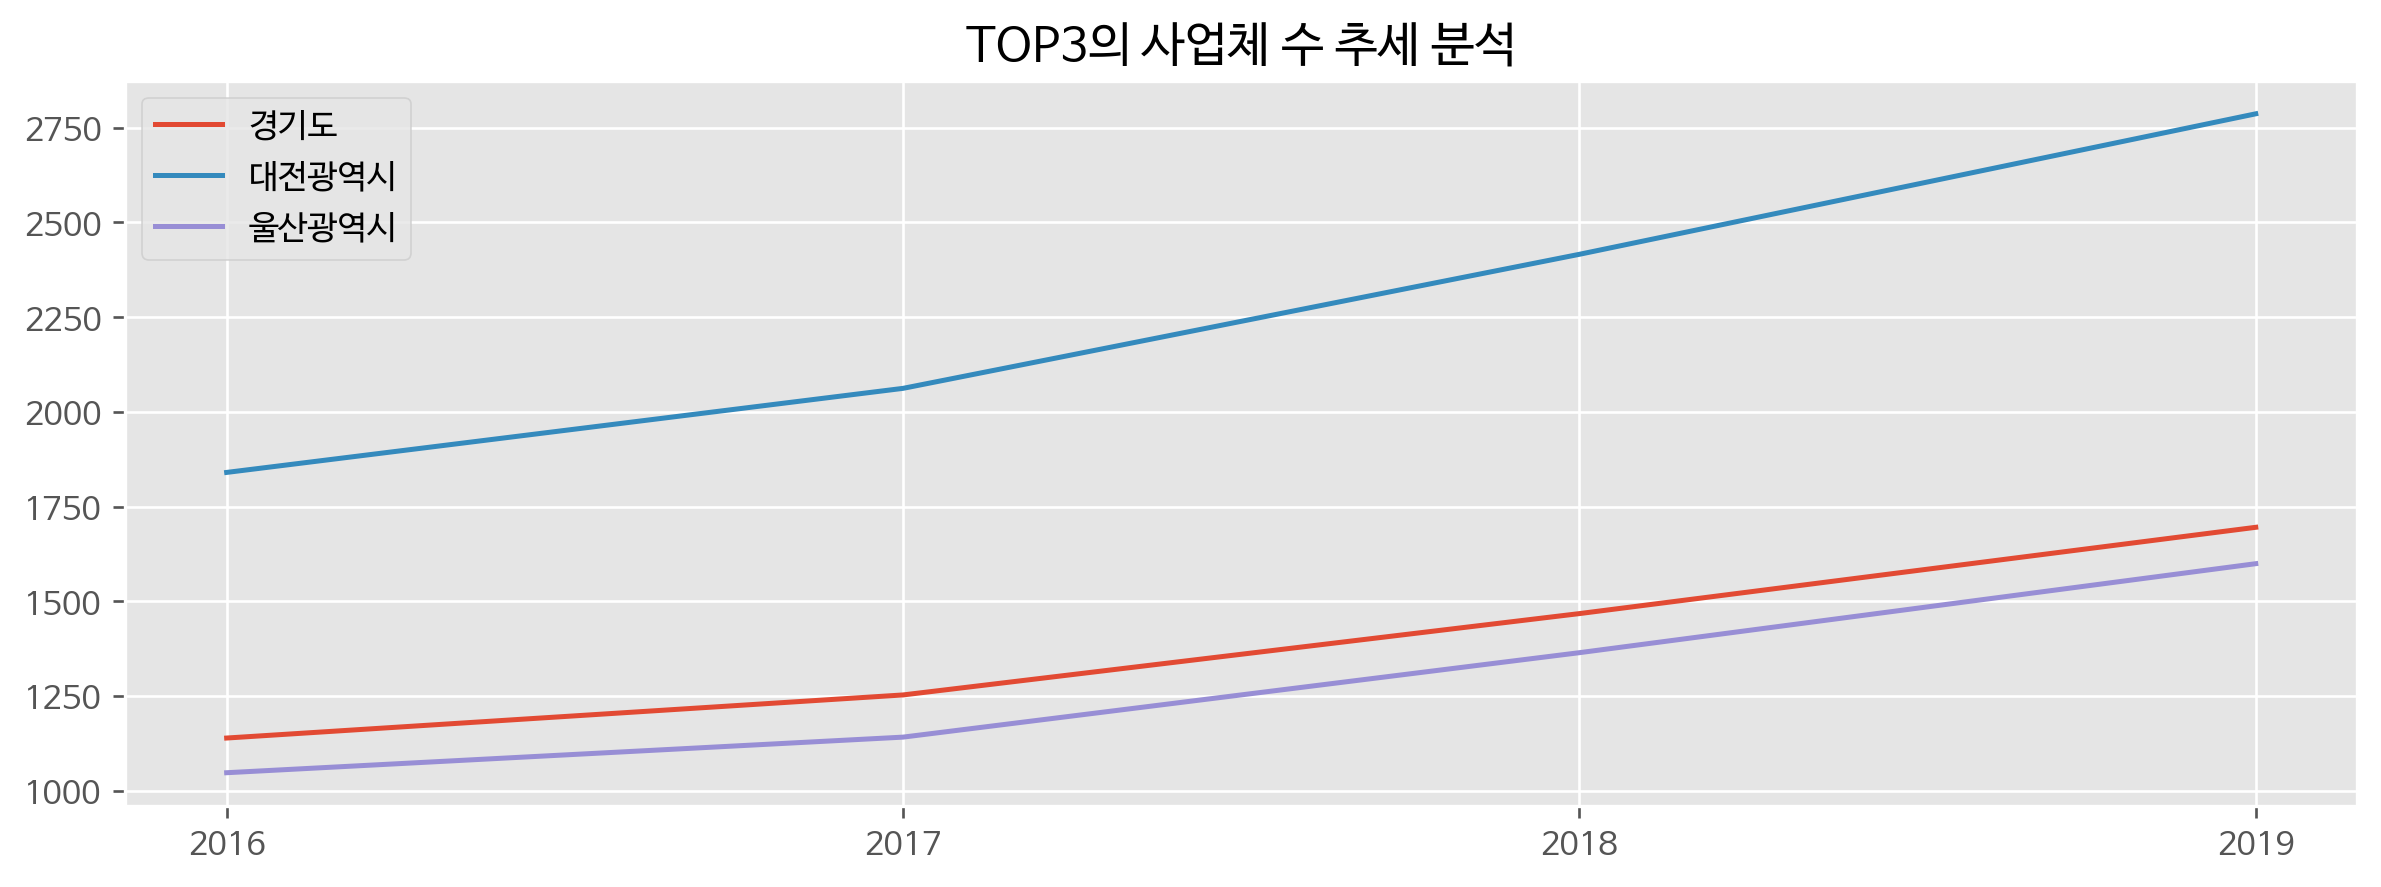

In [133]:
plt.plot((stotal_df.iloc[9][1:] / 10), label = '경기도')  # 한 그래프에 그려주기 위해서
plt.plot(stotal_df.iloc[6][1:], label = '대전광역시')
plt.plot(stotal_df.iloc[7][1:], label = '울산광역시')
plt.title('TOP3의 사업체 수 추세 분석')

plt.legend()
plt.show()